# Synthetic Data Evaluation CTGAN

Lending Club

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
import scipy.stats as stats

import sdv
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN, TVAE
from sdv.evaluation import evaluate
from table_evaluator import TableEvaluator
import sweetviz as sv
import torch
import pickle
import io


import sys
import os
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src'))
from auxiliar.Constants import field_types, field_transformers
from auxiliar.metadata import metadata, table_metadata
from auxiliar.aux_func import qqploter, var_comparative, get_deviation_of_mean_perc, histogram_wo_outliers


import warnings
warnings.filterwarnings('ignore')

{'tables': {'lending_club': {'fields': {'term': {'type': 'categorical', 'transformer': None}, 'int_rate': {'type': 'numerical', 'subtype': 'float', 'transformer': 'float'}, 'sub_grade': {'type': 'categorical', 'transformer': None}, 'emp_length': {'type': 'numerical', 'subtype': 'integer', 'transformer': 'integer'}, 'home_ownership': {'type': 'categorical', 'transformer': None}, 'annual_inc': {'type': 'numerical', 'subtype': 'float', 'transformer': 'float'}, 'verification_status': {'type': 'boolean', 'transformer': 'boolean'}, 'purpose': {'type': 'categorical', 'transformer': None}, 'addr_state': {'type': 'categorical', 'transformer': None}, 'dti': {'type': 'numerical', 'subtype': 'float', 'transformer': 'float'}, 'delinq_2yrs': {'type': 'numerical', 'subtype': 'float', 'transformer': 'float'}, 'earliest_cr_line': {'type': 'categorical', 'transformer': None}, 'fico_range_low': {'type': 'numerical', 'subtype': 'float', 'transformer': 'float'}, 'open_acc': {'type': 'numerical', 'subtype':

In [2]:
train = pd.read_parquet("../data/processed/train.parquet")
test = pd.read_parquet("../data/processed/test.parquet")

In [3]:
# Real and synthetic data
generator = CTGAN.load('../models/ctgan.pkl') 

In [8]:
%%time
np.random.seed(2022)
synthetic_data = generator.sample(len(train)*2)

CPU times: user 1min 10s, sys: 3.29 s, total: 1min 13s
Wall time: 51 s


In [10]:
#save data
synthetic_data.to_parquet('../data/synth/synth_ctgan.parquet', index=False)

In [3]:
#load data
synthetic_data = pd.read_parquet('../data/synth/synth_ctgan.parquet')

In [4]:
#synth data example
synthetic_data

term   int_rate sub_grade  emp_length home_ownership     annual_inc  \
0         36  14.850404        C3           2           RENT   44086.172452   
1         36  17.836075        E3           7           RENT   63402.906701   
2         60  12.413362        C2           1       MORTGAGE  109669.441267   
3         36  14.046578        C5          10            OWN   31802.253044   
4         36  18.796476        D4           2           RENT   64557.718261   
...      ...        ...       ...         ...            ...            ...   
884665    60  18.420012        D5           3           RENT   62563.087618   
884666    36  12.396992        C2           4           RENT   46045.983326   
884667    60  13.049829        C1           1       MORTGAGE  110432.293329   
884668    36  10.114408        B1          10           RENT   47784.371422   
884669    36   9.992918        B3           4       MORTGAGE  113849.389371   

        verification_status             purpose addr_state    dti  ...  \
0                         0  debt_consolidation         VA  18.33  ...   
1                         0               other         AK  11.48  ...   
2                         1  debt_consolidation         TX  18.20  ...   
3                         0         credit_card         NJ  25.65  ...   
4                         0               other         VA  21.90  ...   
...                     ...                 ...        ...    ...  ...   
884665                    0             medical         TX  31.02  ...   
884666                    1  debt_consolidation         MO  11.79  ...   
884667                    1    home_improvement         NM   9.59  ...   
884668                    1  debt_consolidation         CA  26.65  ...   
884669                    1  debt_consolidation         CA  20.20  ...   

        application_type acc_open_past_24mths  mort_acc  pub_rec_bankruptcies  \
0                      0                  3.0       0.0                   0.0   
1                      0                  9.0       0.0                   0.0   
2                      0                  8.0       3.0                   0.0   
3                      0                  4.0       0.0                   1.0   
4                      0                  1.0       0.0                   0.0   
...                  ...                  ...       ...                   ...   
884665                 0                 14.0       4.0                   0.0   
884666                 0                  4.0       0.0                   1.0   
884667                 0                  5.0       2.0                   0.0   
884668                 0                  4.0       0.0                   0.0   
884669                 0                  7.0       1.0                   0.0   

        tax_liens  disbursement_method  issue_month  issue_year  \
0             0.0                    0          Jan        2015   
1             0.0                    0          Jan        2015   
2             0.0                    0          Apr        2017   
3             0.0                    0          Sep        2014   
4             0.0                    0          Jun        2015   
...           ...                  ...          ...         ...   
884665        0.0                    0          Jul        2015   
884666        0.0                    0          Oct        2015   
884667        0.0                    0          May        2015   
884668        0.0                    0          Jul        2015   
884669        0.0                    0          Jun        2014   

        earliest_cr_year  loan_status  
0                   1998            0  
1                   2000            0  
2                   1997            0  
3                   1994            0  
4                   2008            0  
...                  ...          ...  
884665              2008            0  
884666              2003            0  
884667              2001        

## Train Test Comparison

                                             |          | [  0%]   00:00 -> (? left)


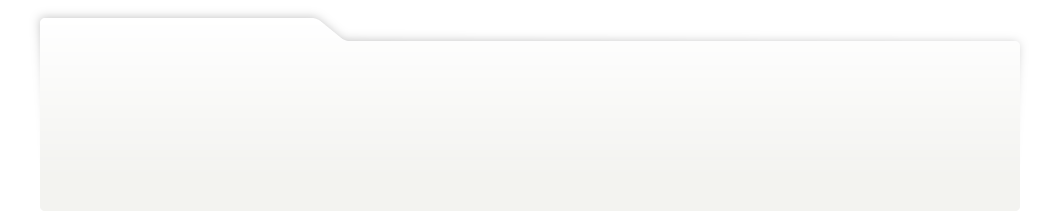
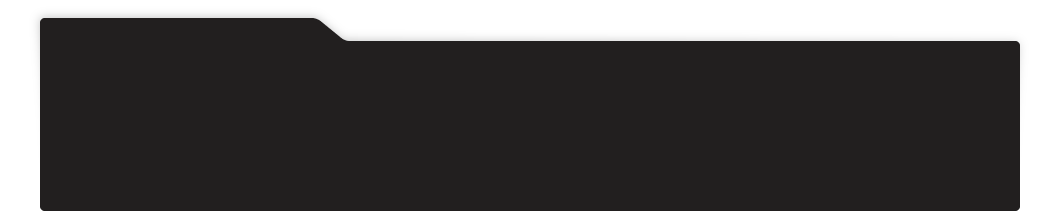
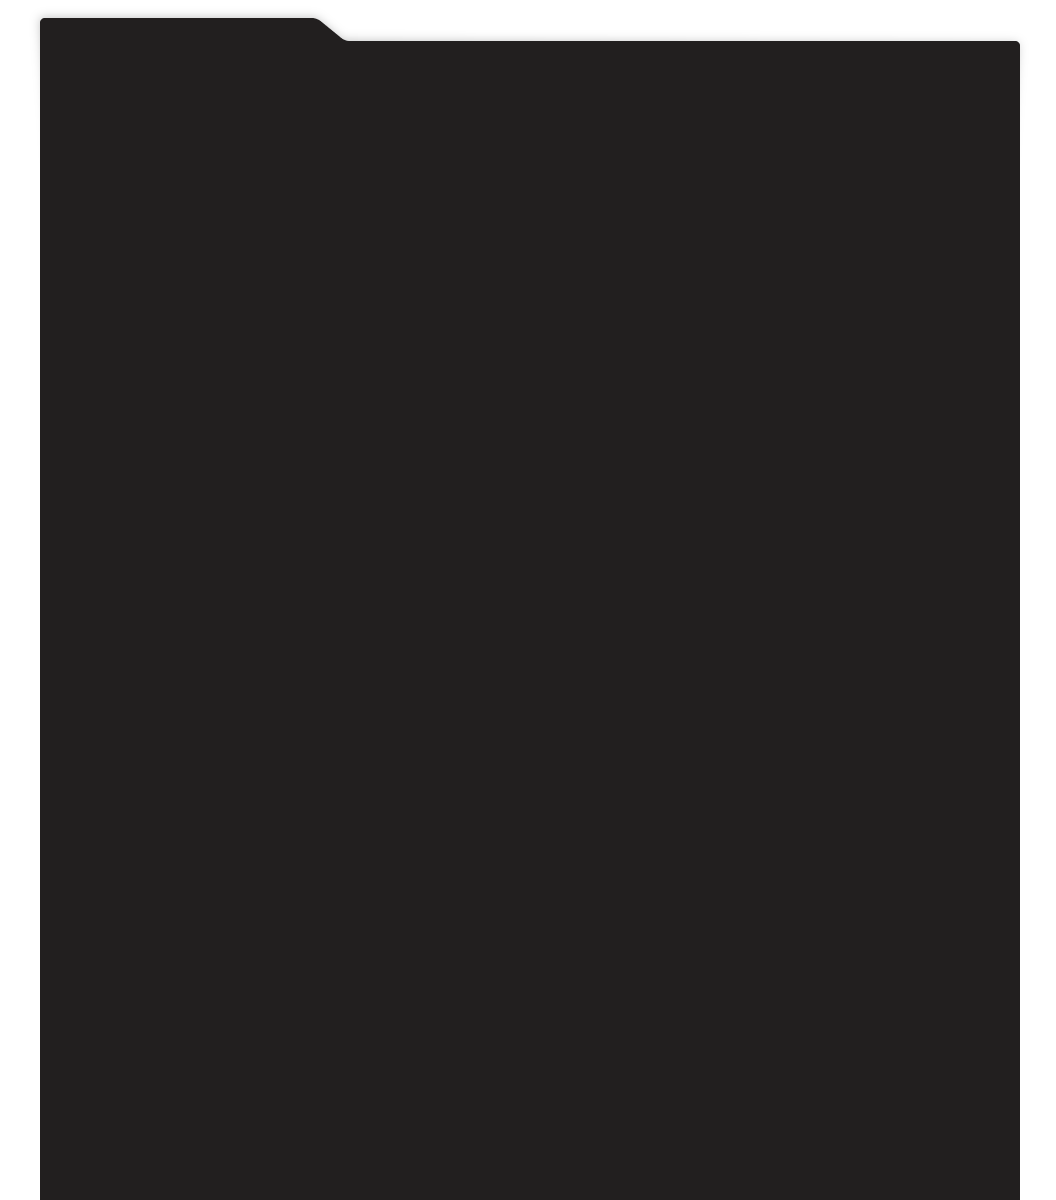
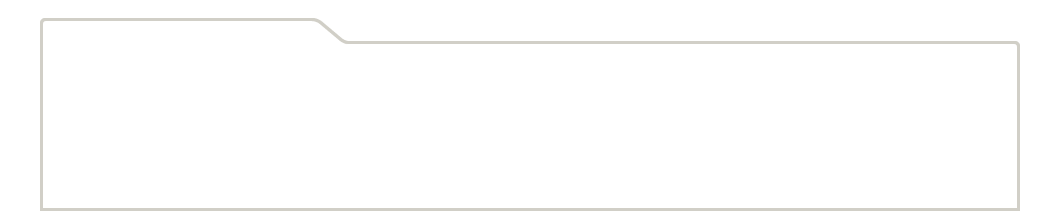
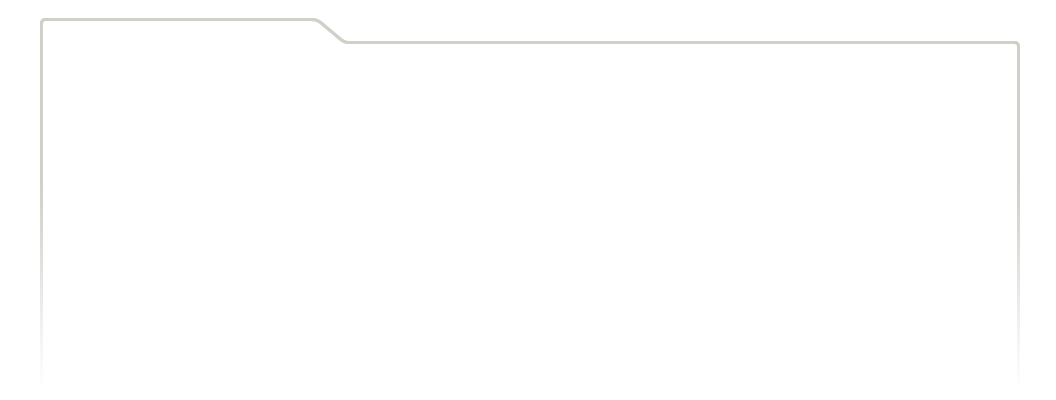
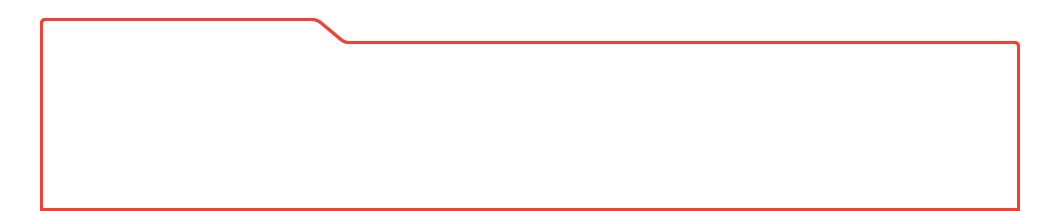
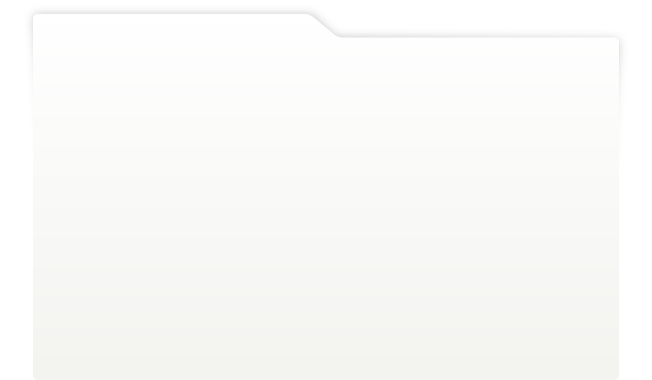
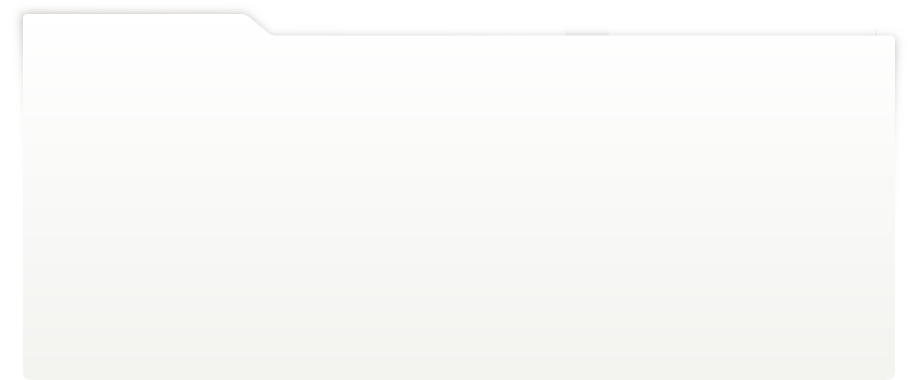
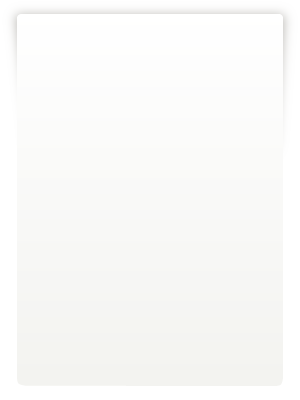
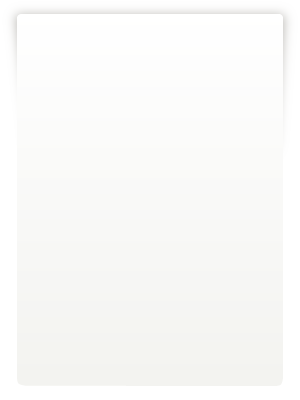
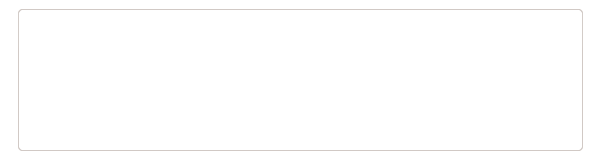
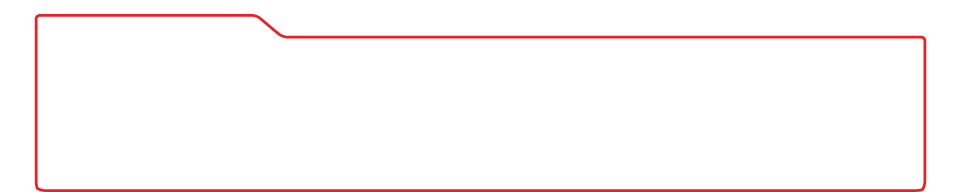
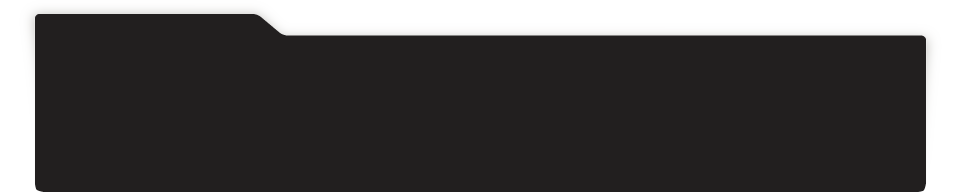
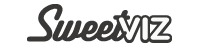
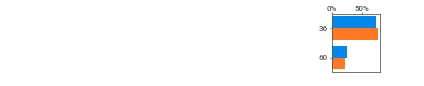
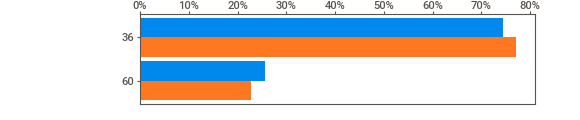
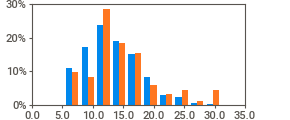
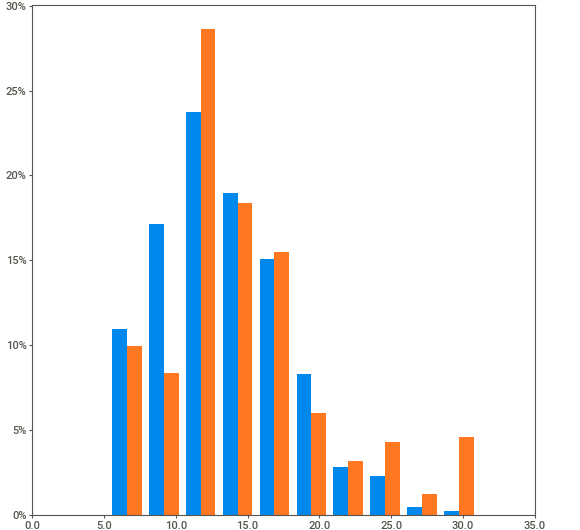
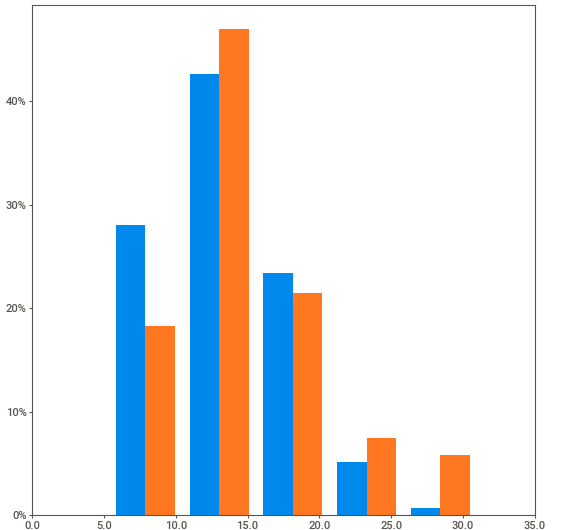
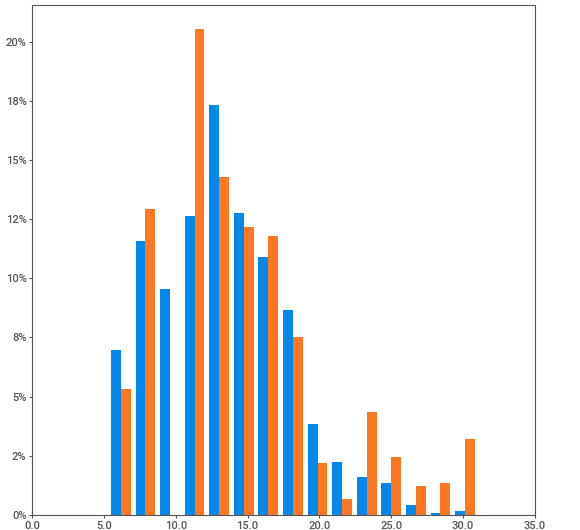
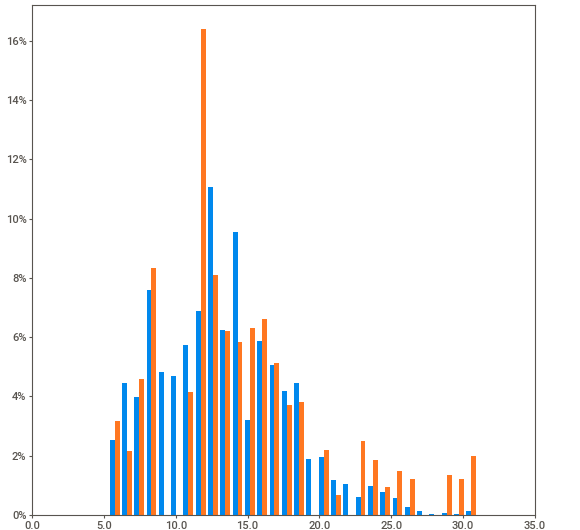
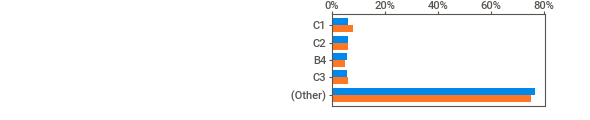
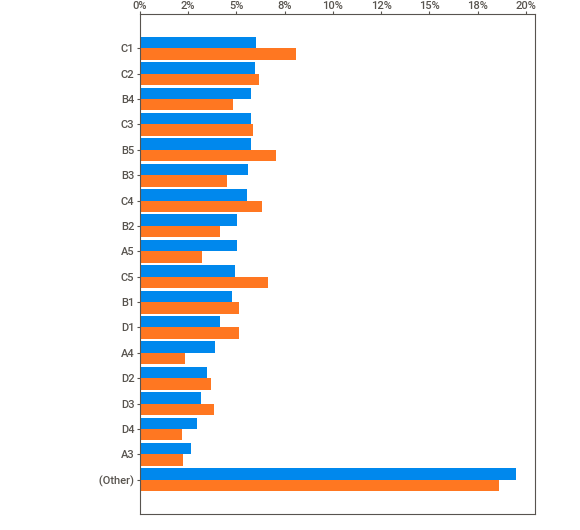
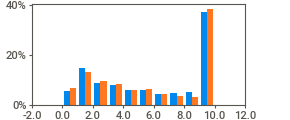
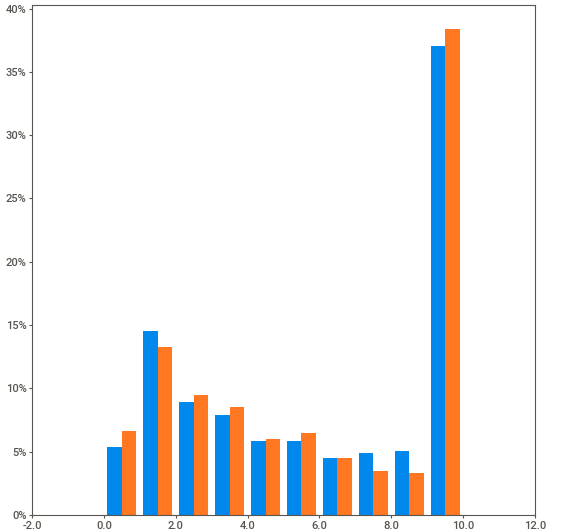
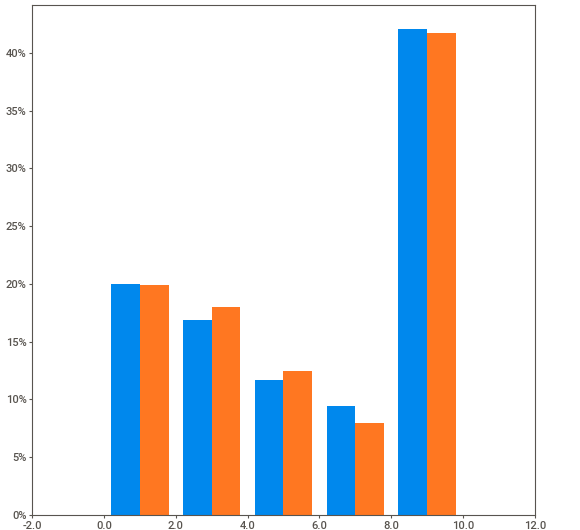
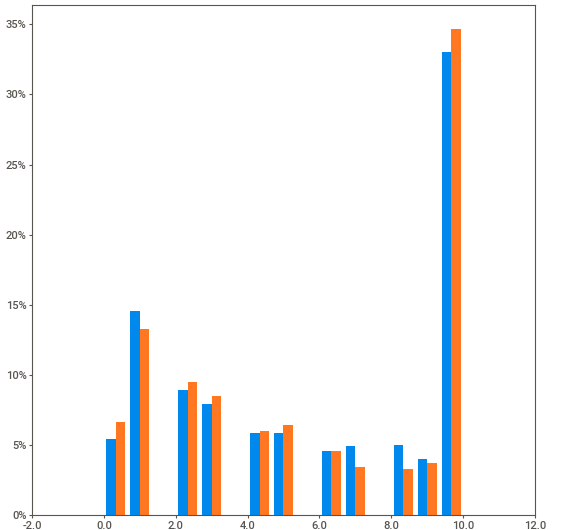
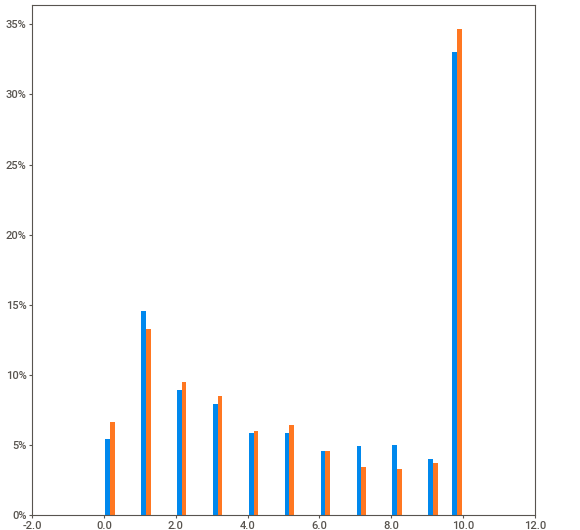
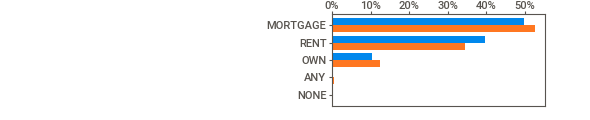
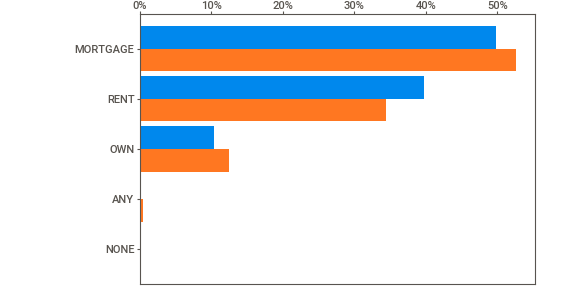
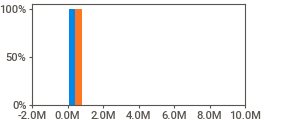
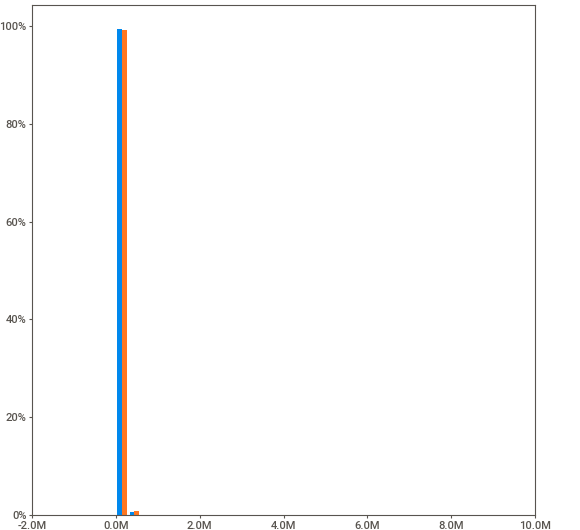
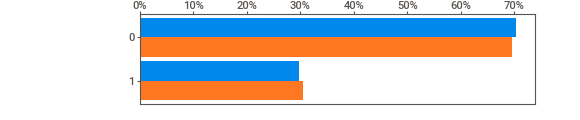
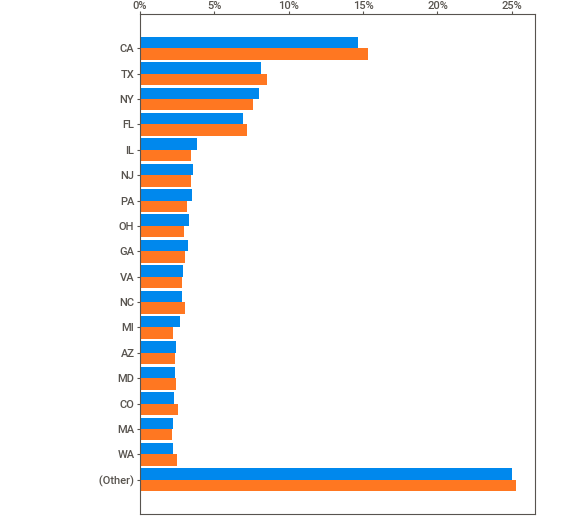
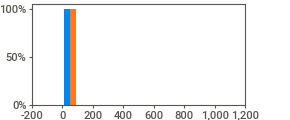
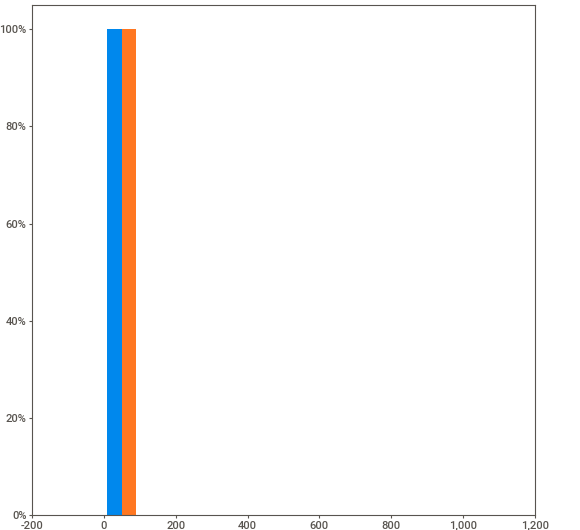
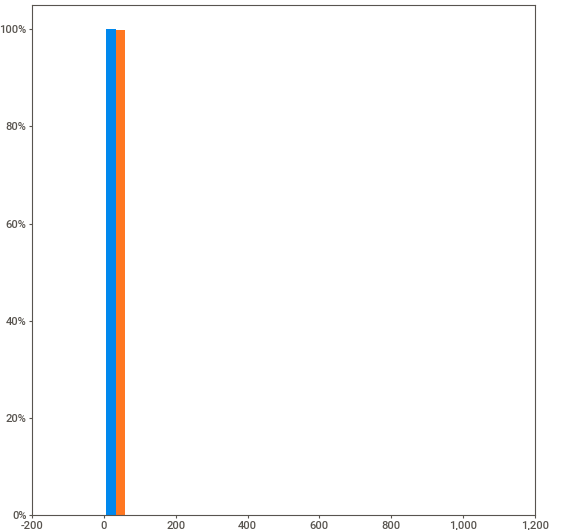
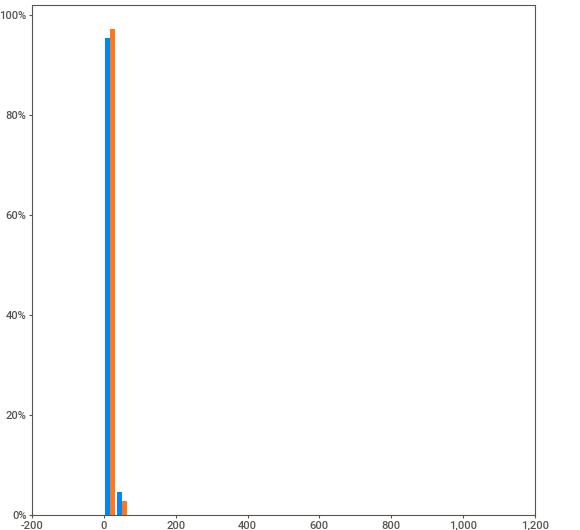
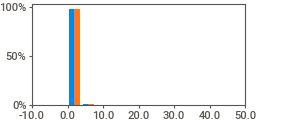
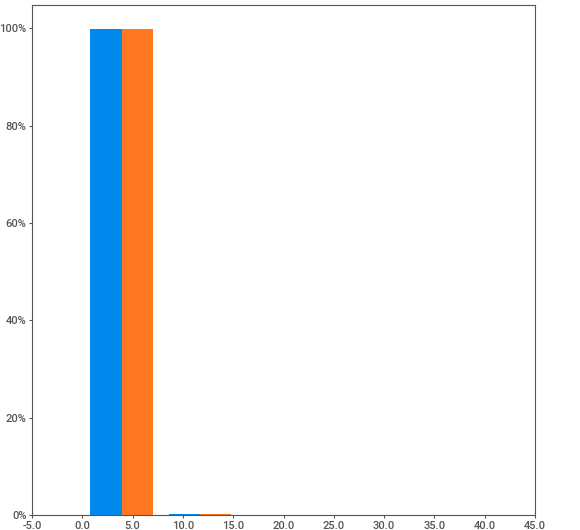
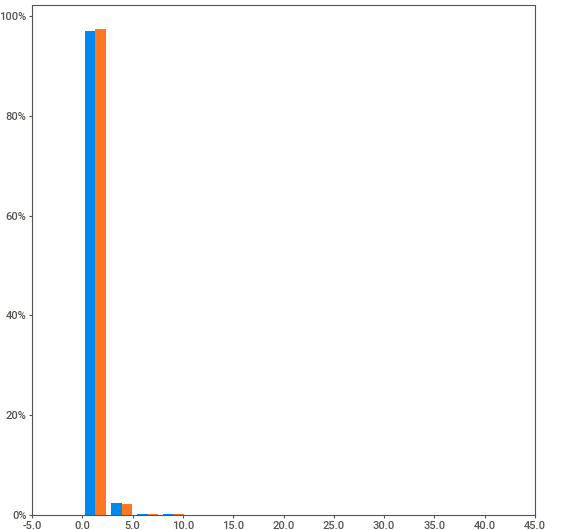
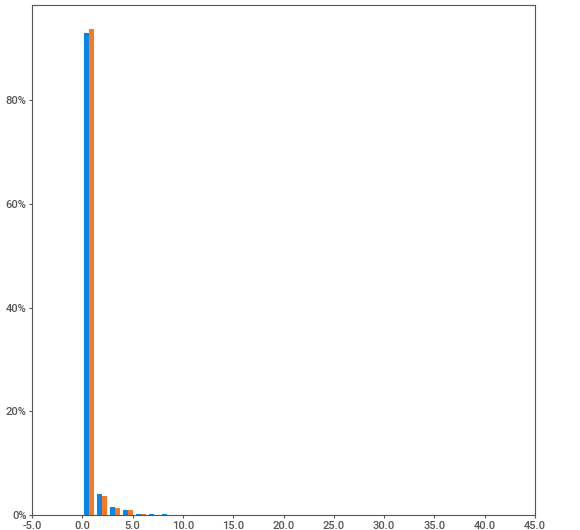
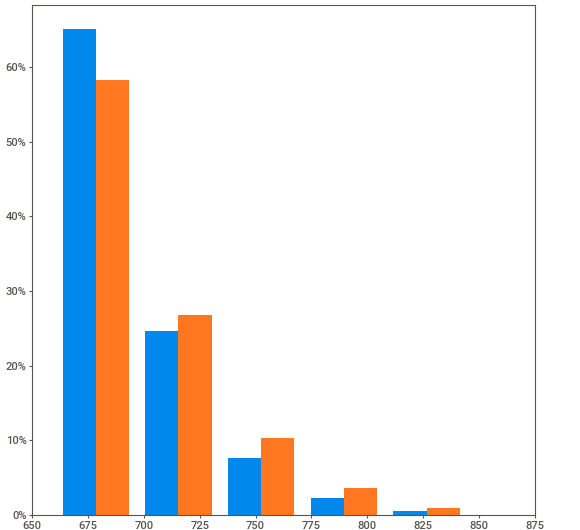
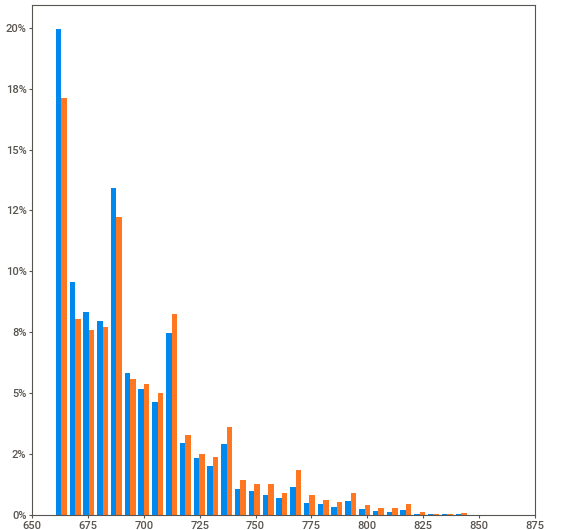
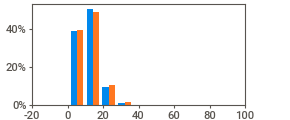
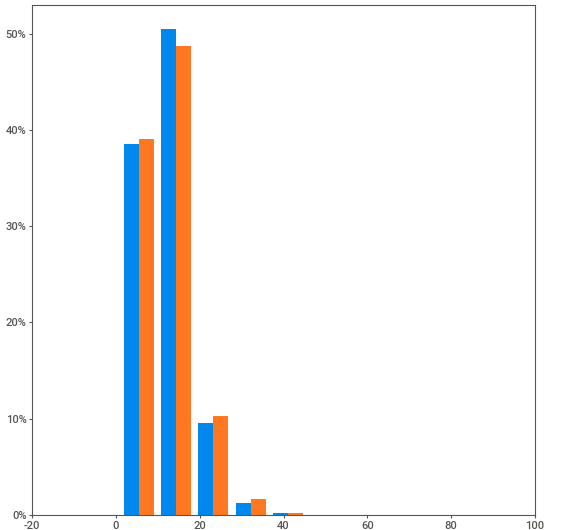
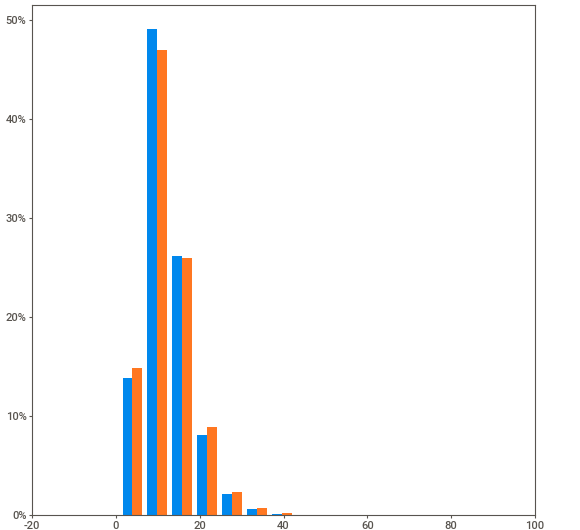
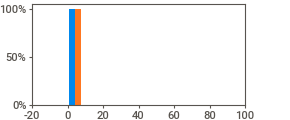
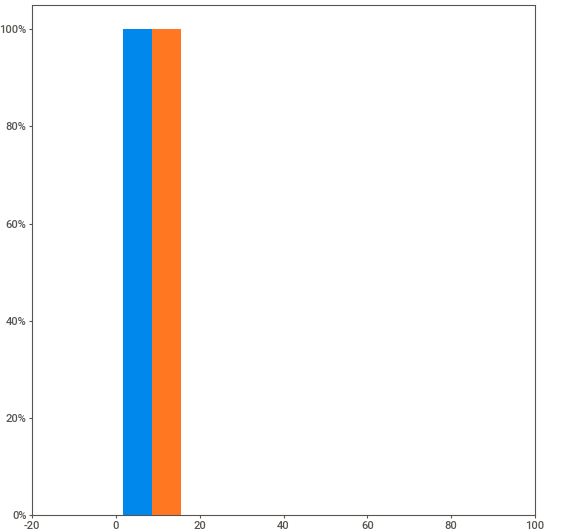
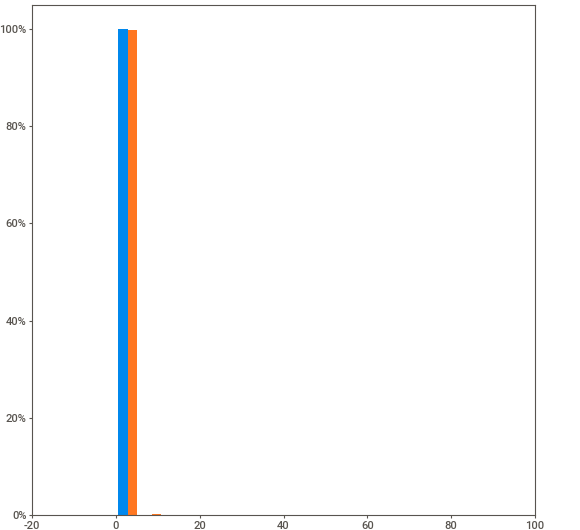
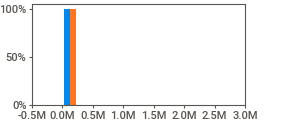
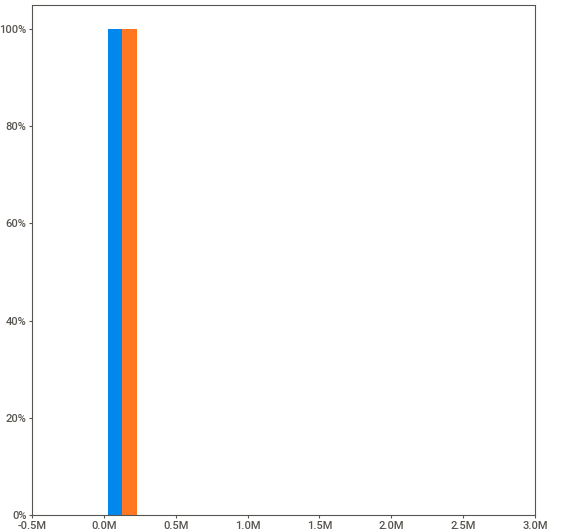
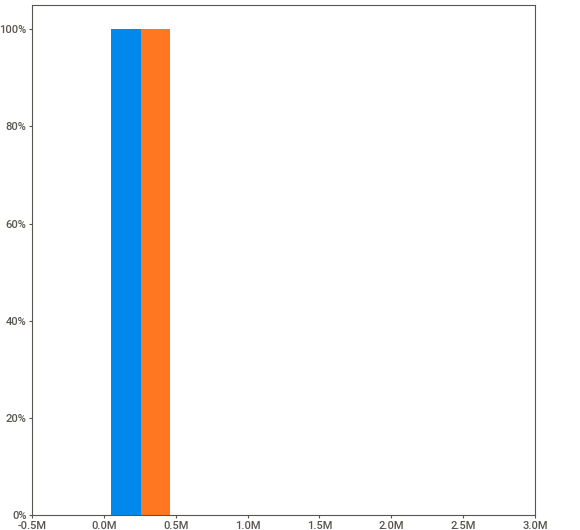
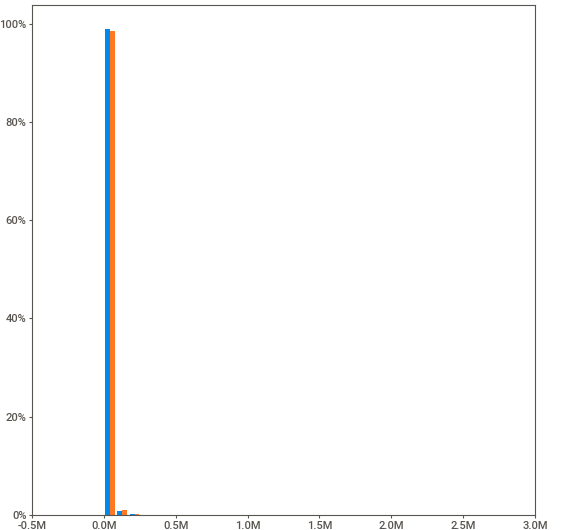
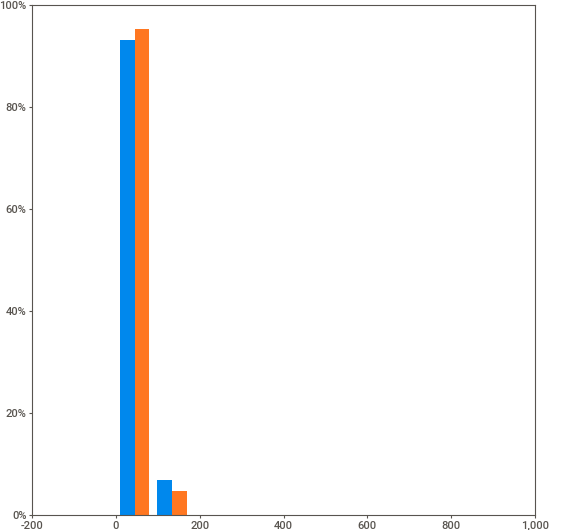
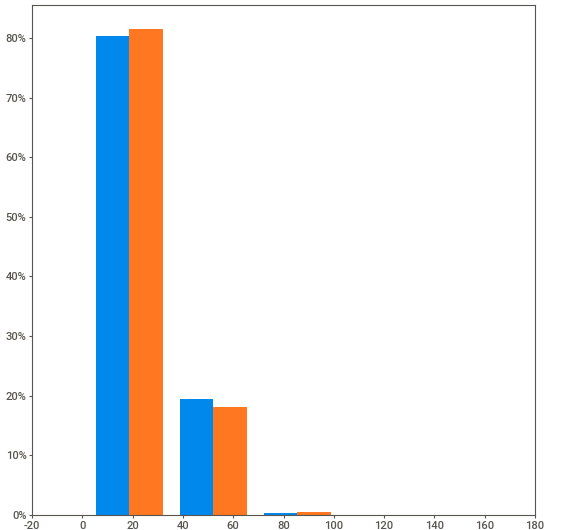
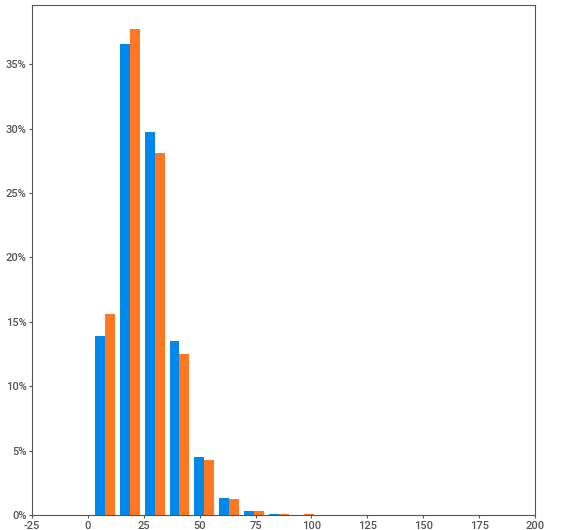
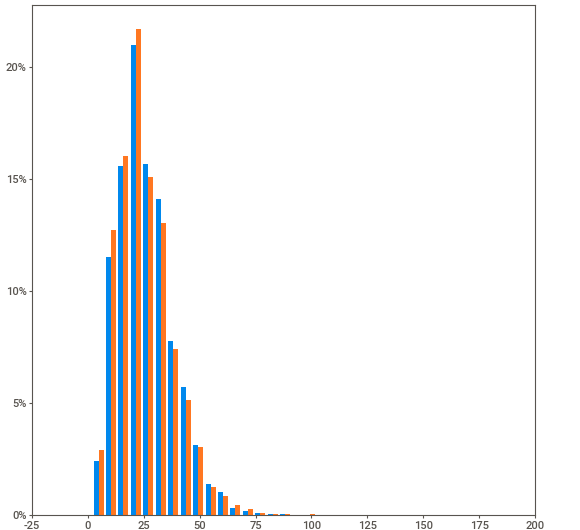
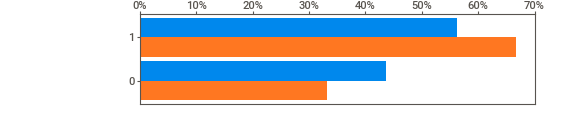
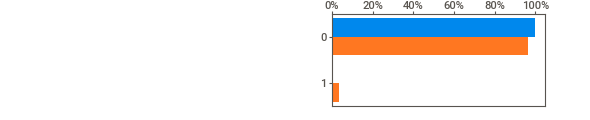
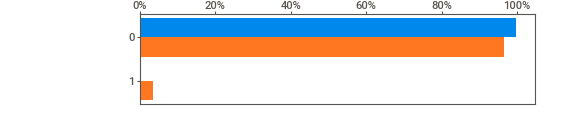
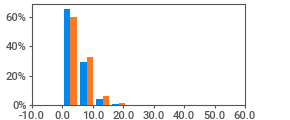
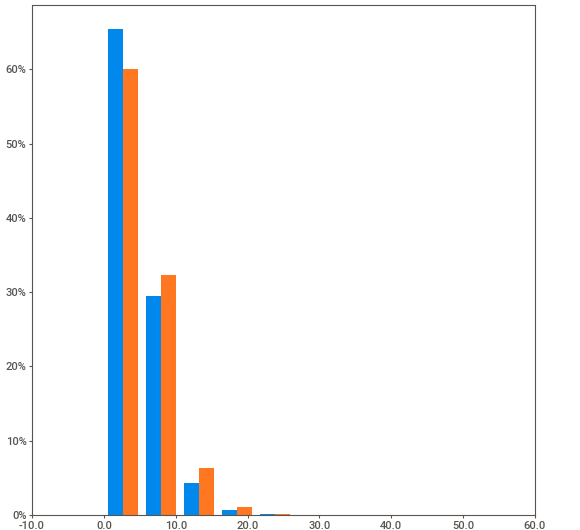
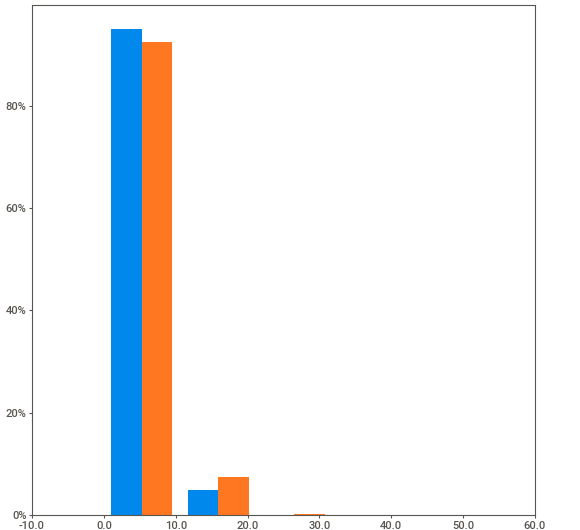
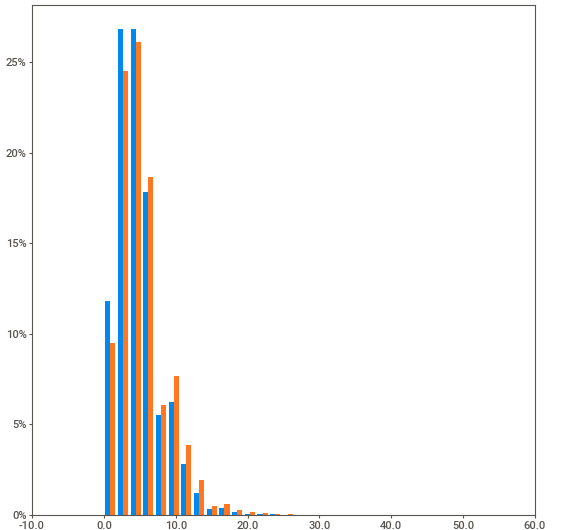
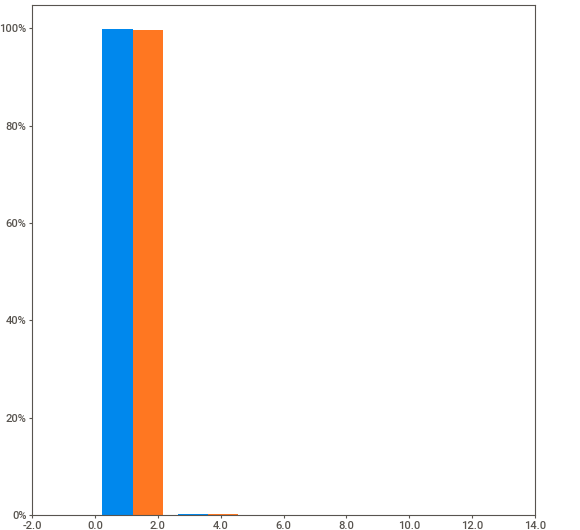
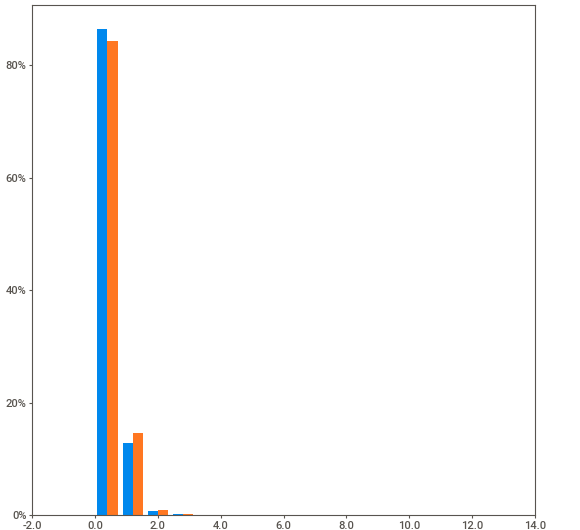
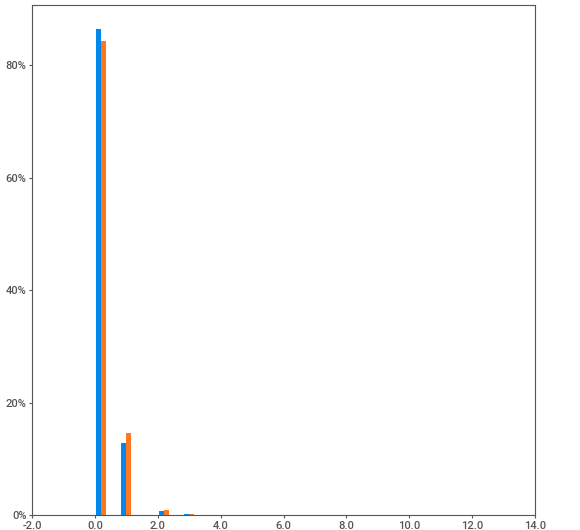
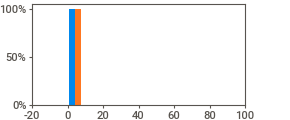
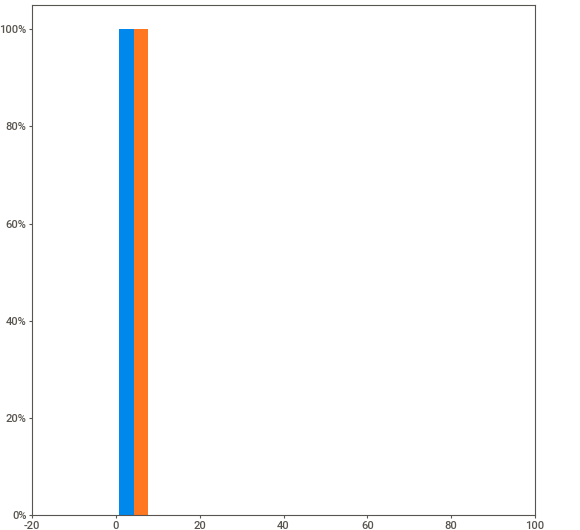
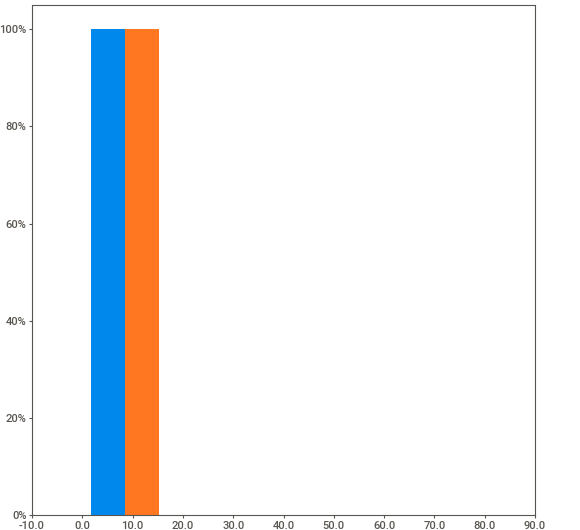
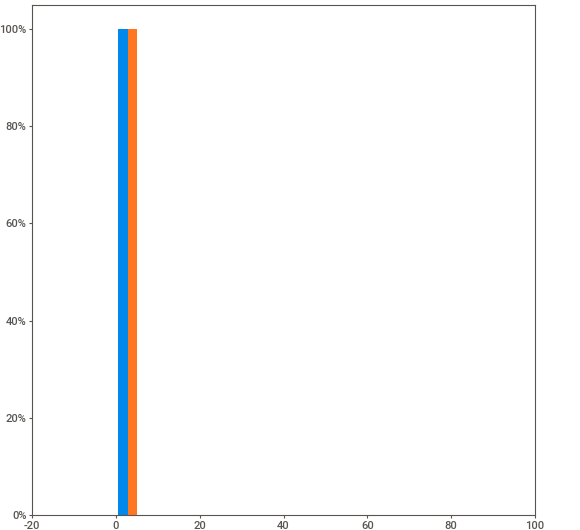
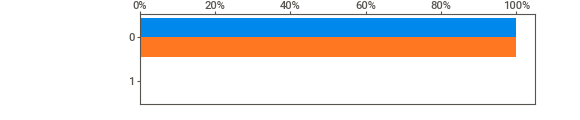
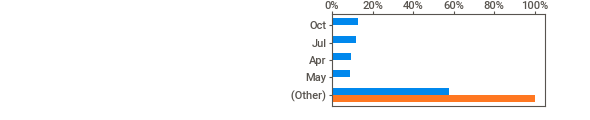
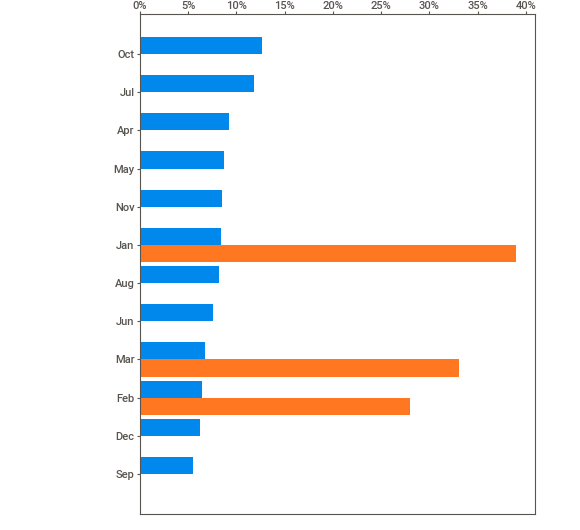
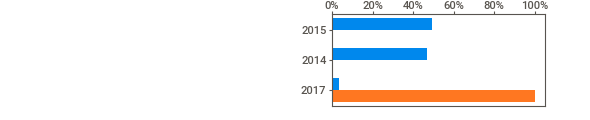
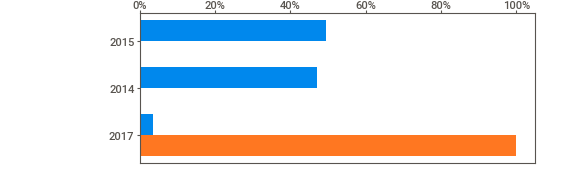
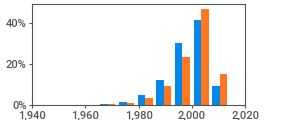
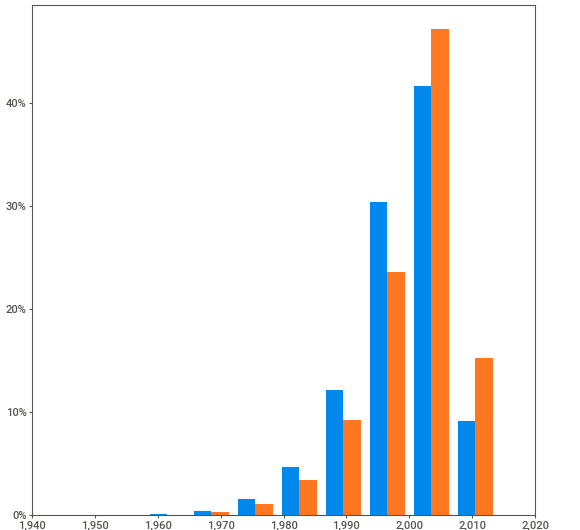
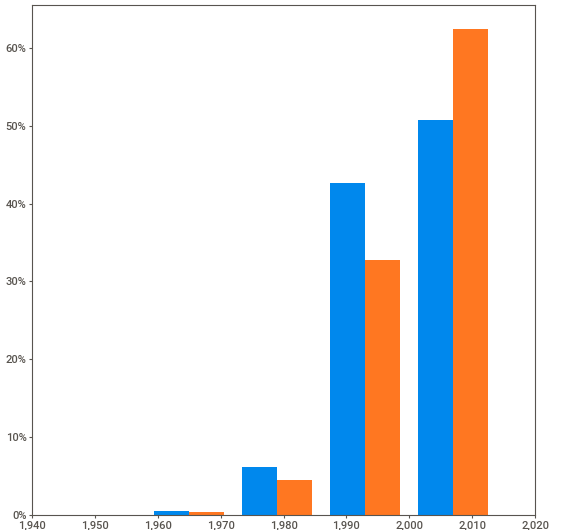
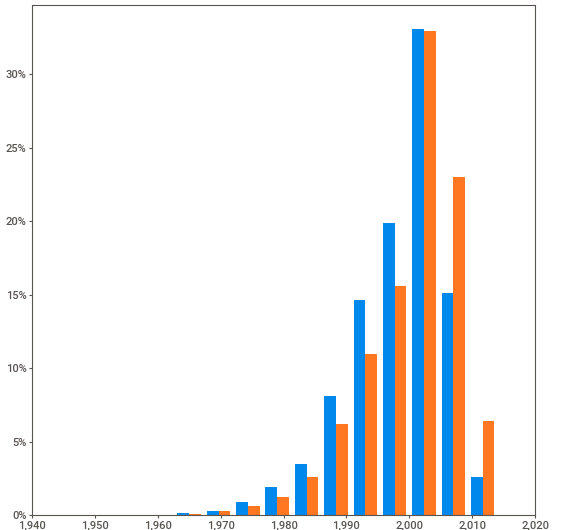
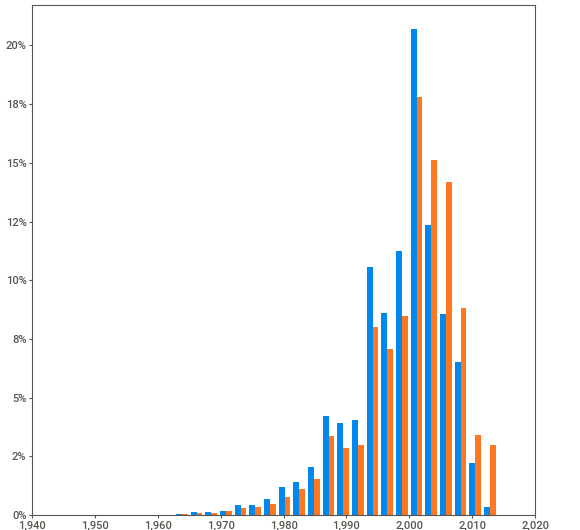
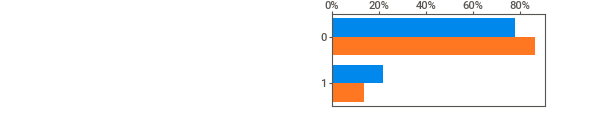
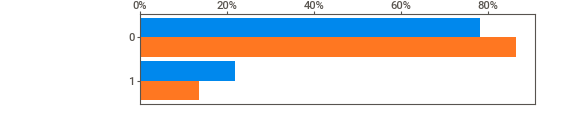
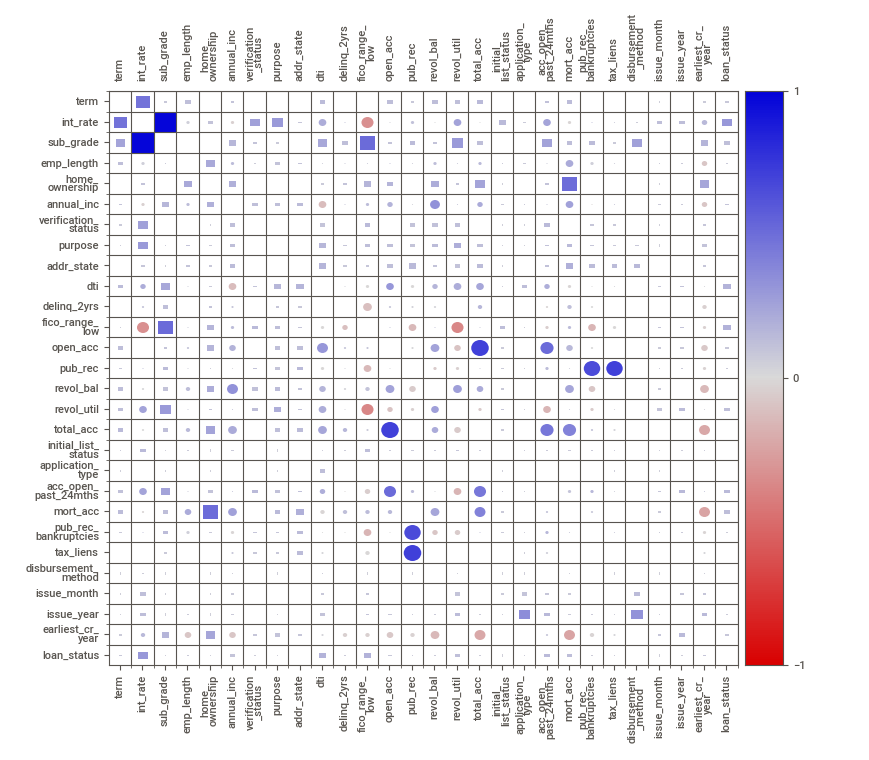
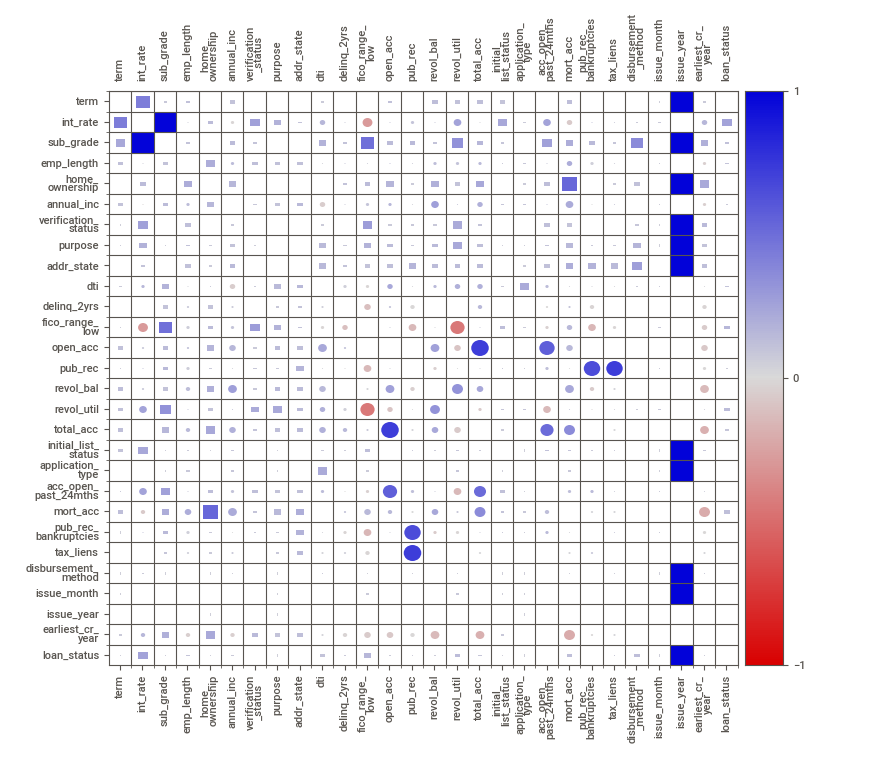

In [9]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([train, "Train"], [test, "Test"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

## Real Data & Synthetic Data Comparison

Train y test son distintos puesto que el test es un conjunto de datos posterior en el tiempo. En este caso tiene más sentido comparar los datos sintéticos con el train primero para visualizar y con el test segundo para eficacia en el modelado

In [5]:
real_data = train

In [6]:
my_report = sv.compare([real_data, "Real Data"], [synthetic_data, "Synthetic Data"])
my_report.show_html( filepath='../reports/SWEETVIZ_REPORT_CTGAN.html', 
            open_browser=False, 
            layout='widescreen', 
            scale=None)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/SWEETVIZ_REPORT_CTGAN.html was generated.


                                             |          | [  0%]   00:00 -> (? left)


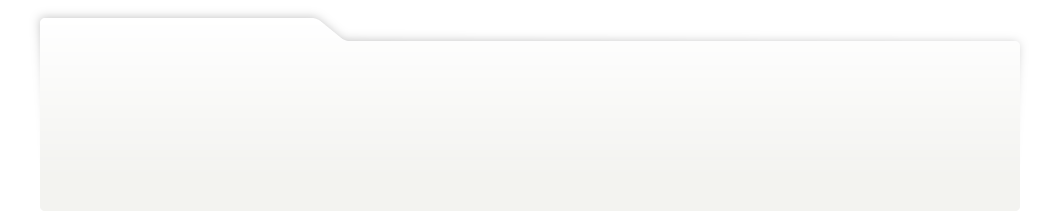
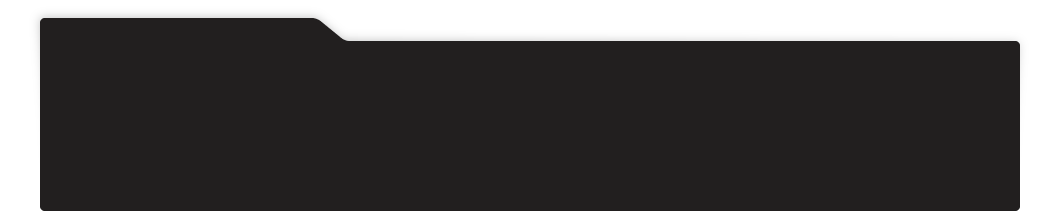
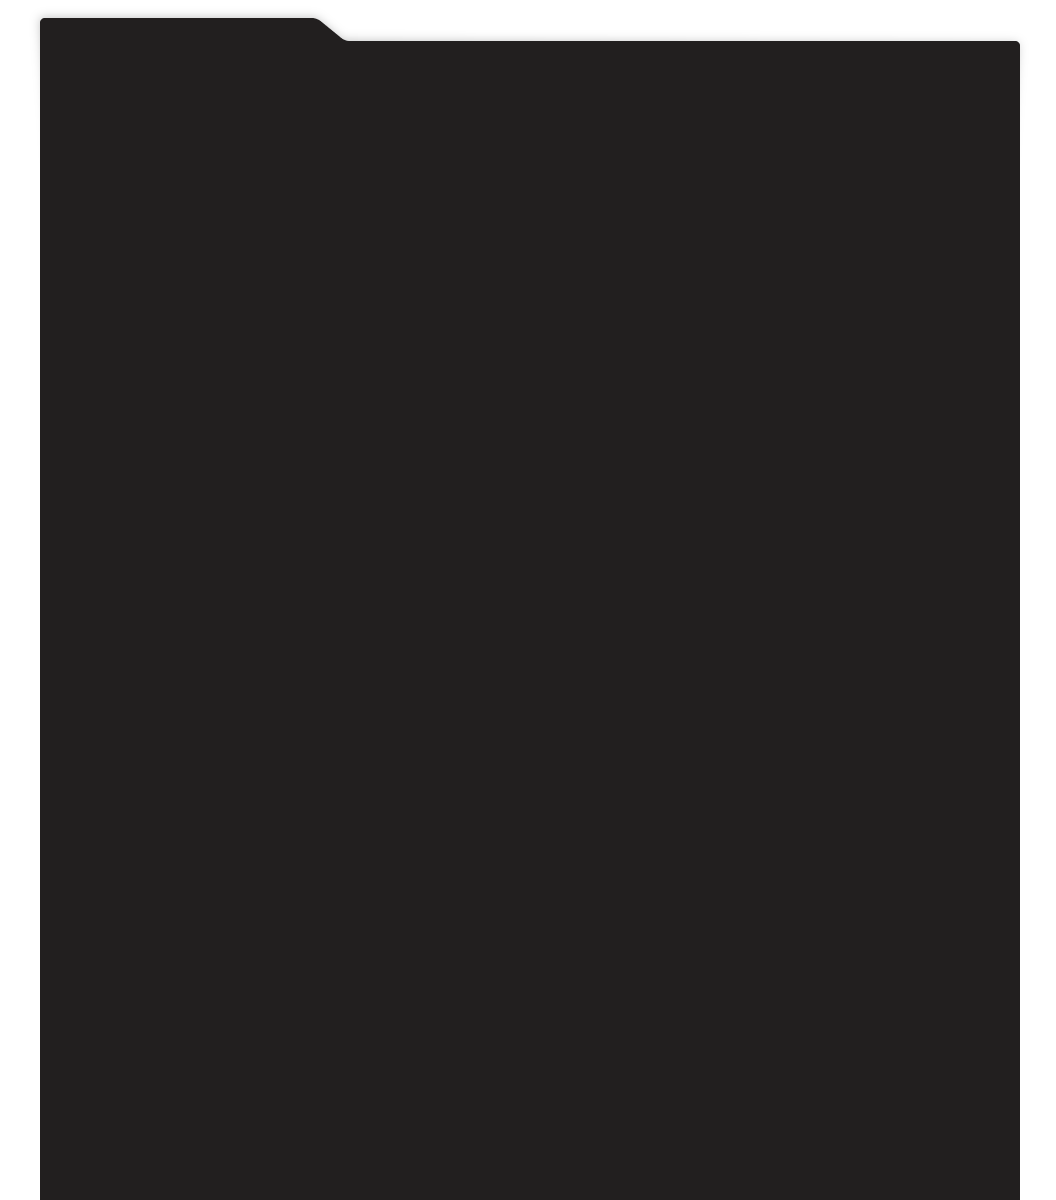
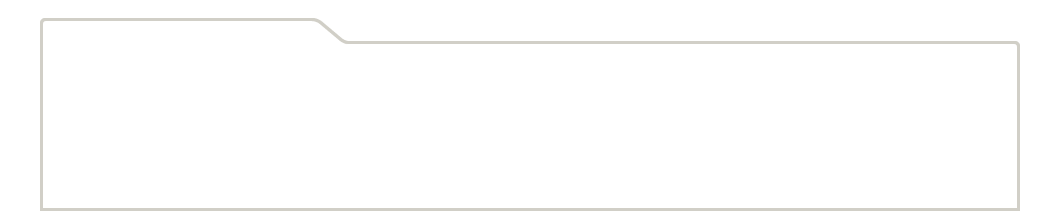
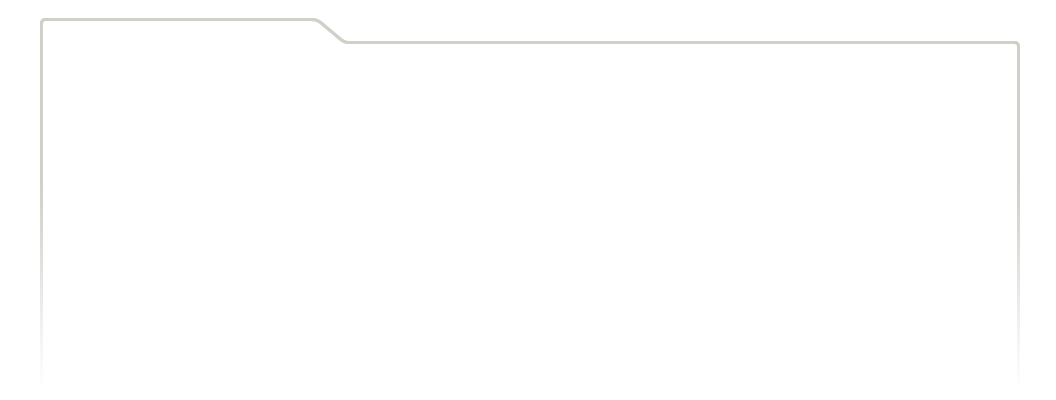
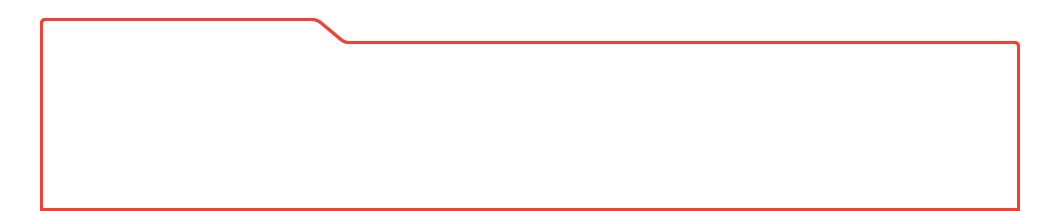
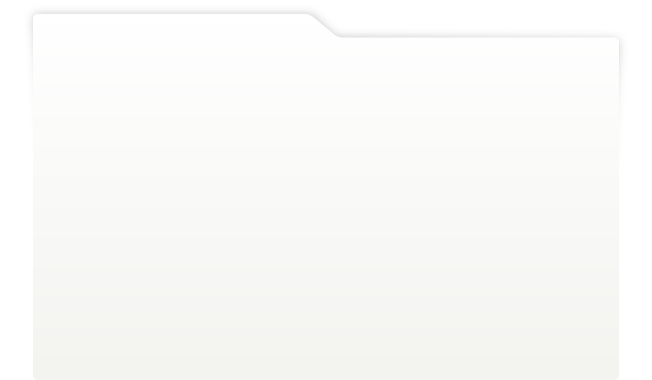
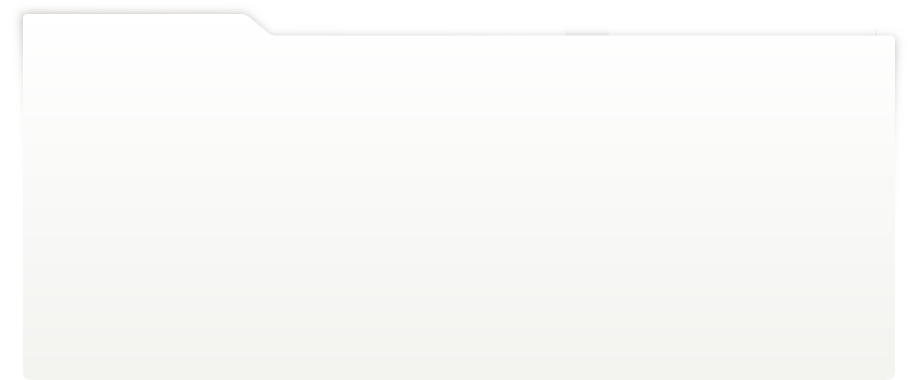
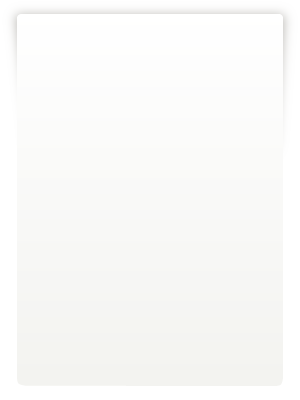
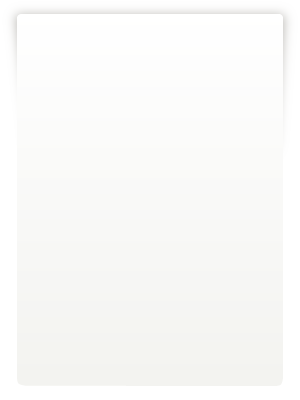
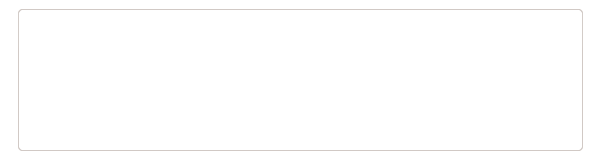
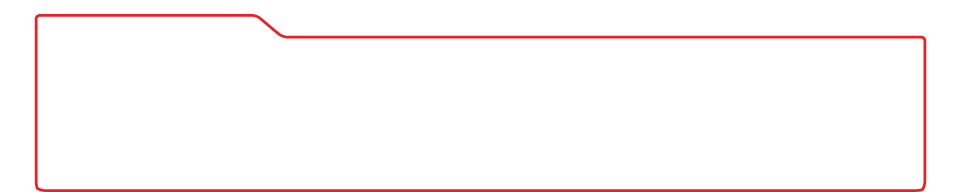
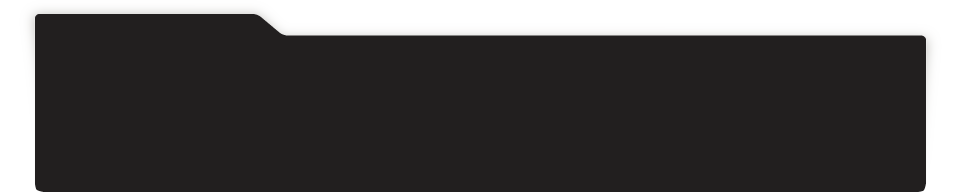
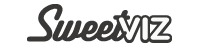
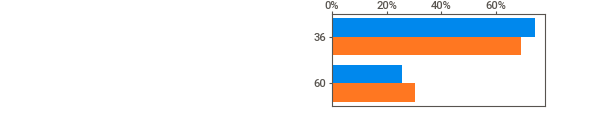
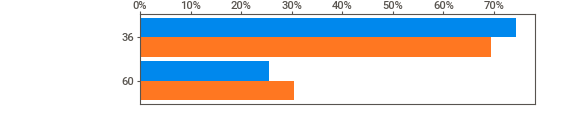
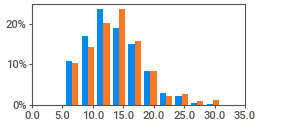
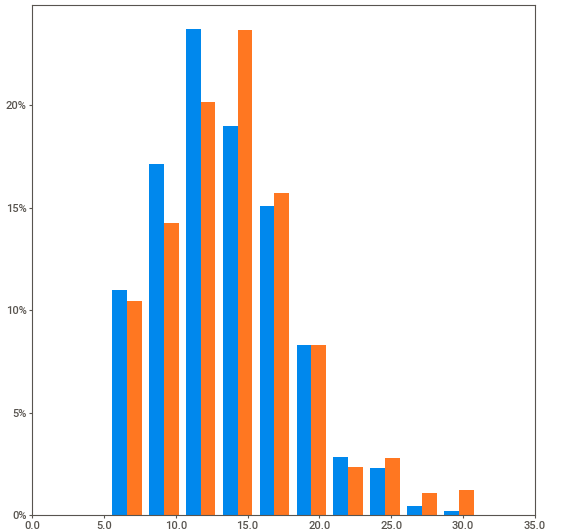
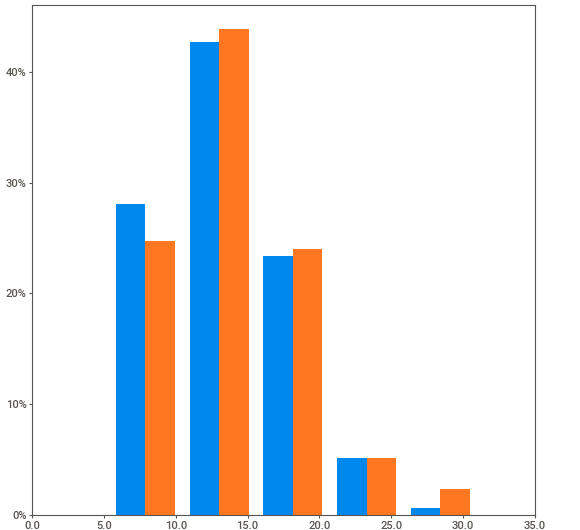
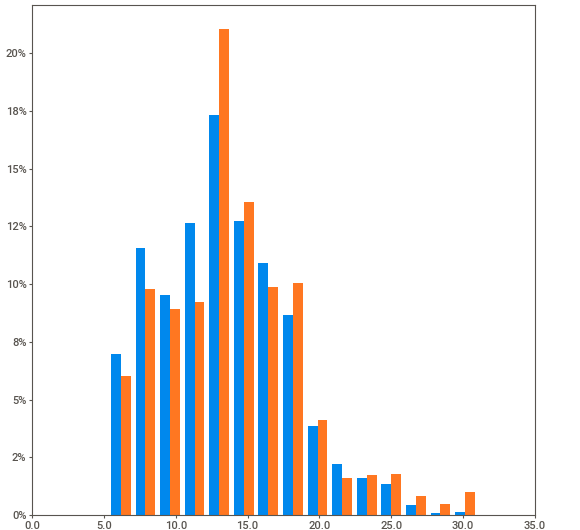
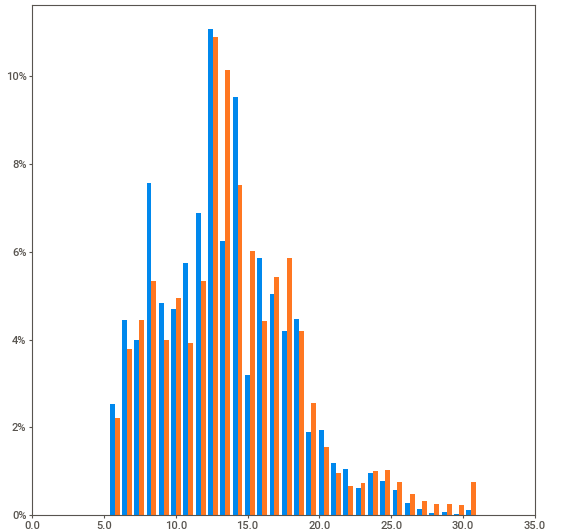
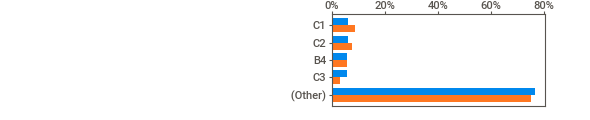
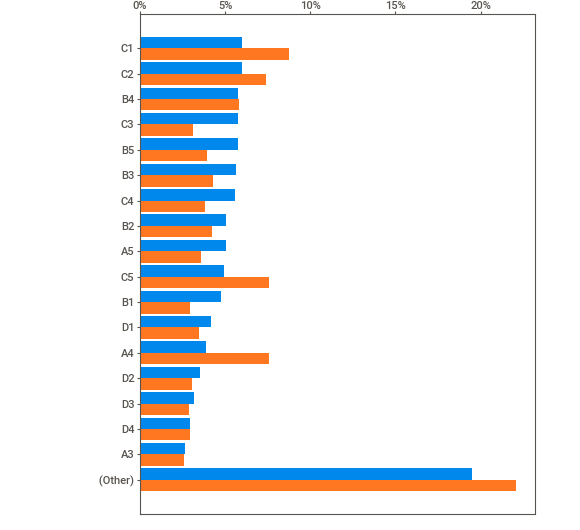
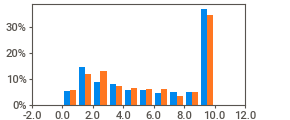
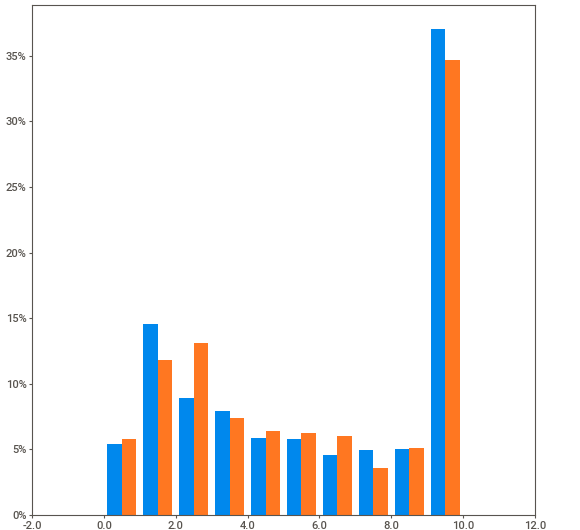
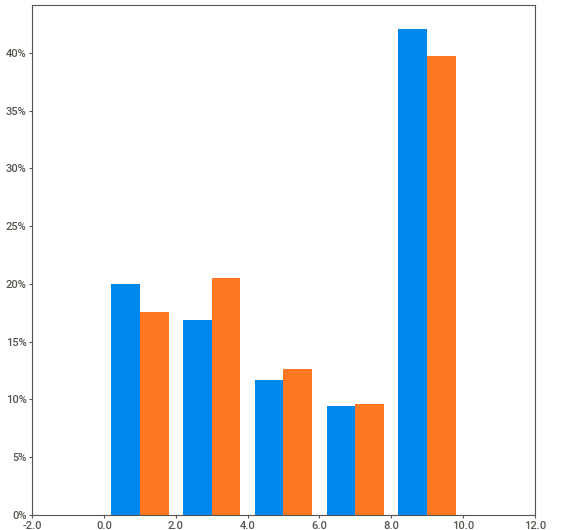
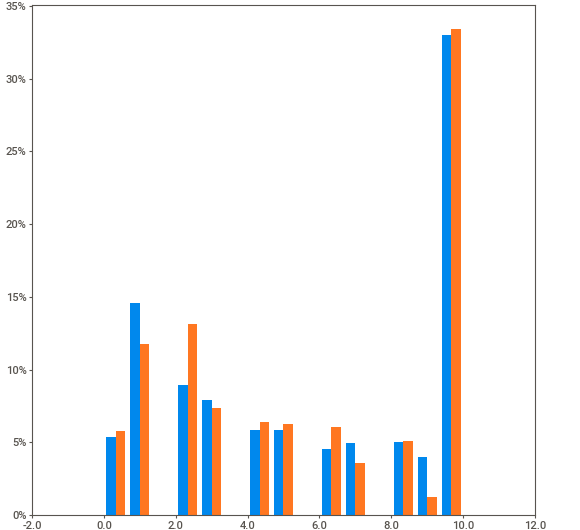
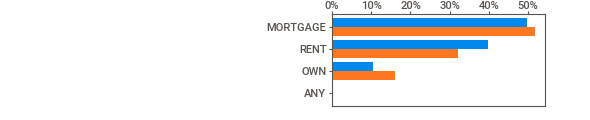
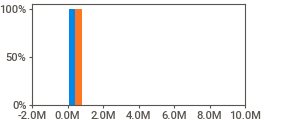
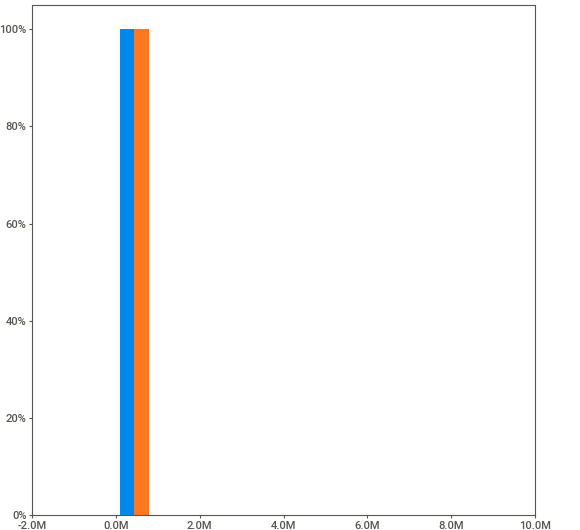
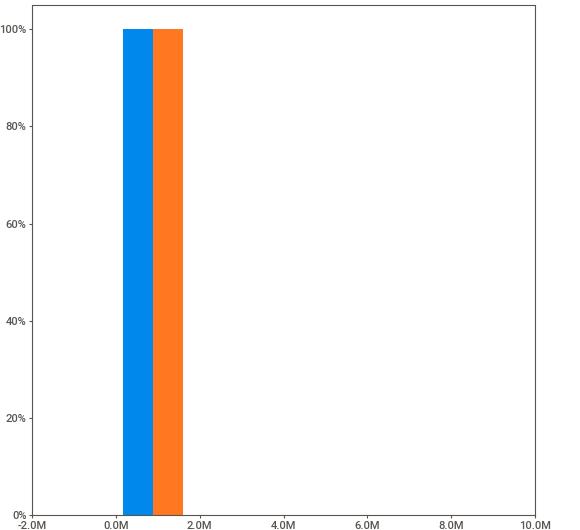
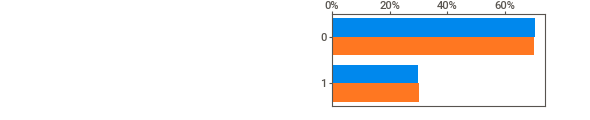
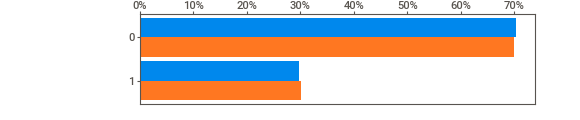
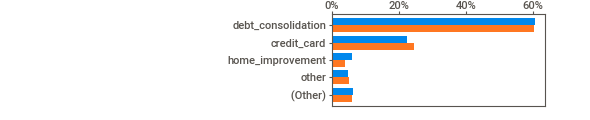
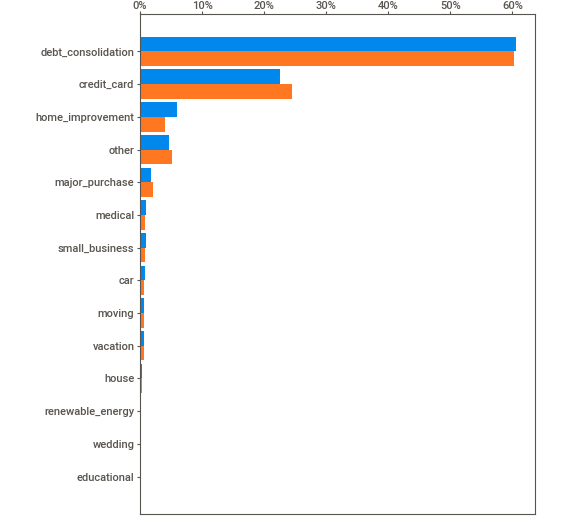
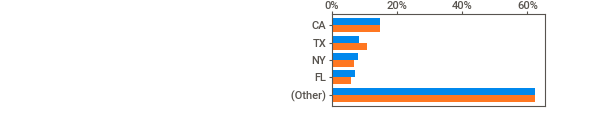
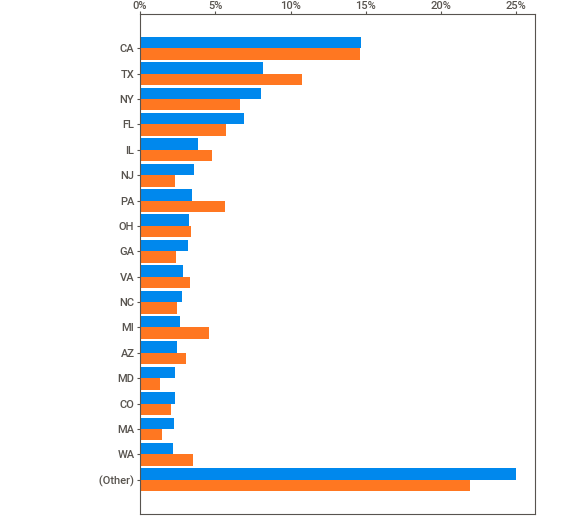
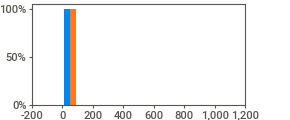
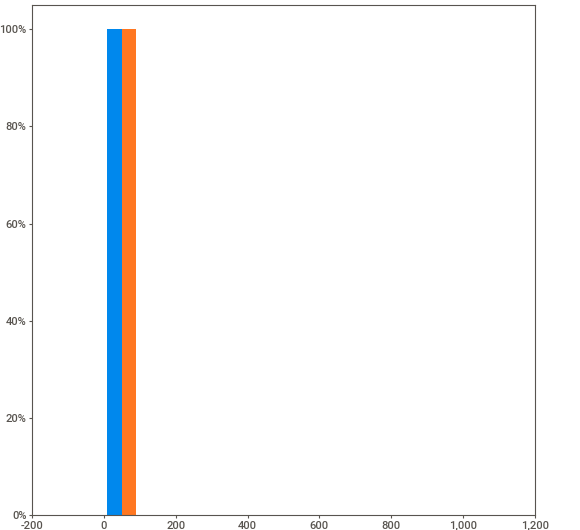
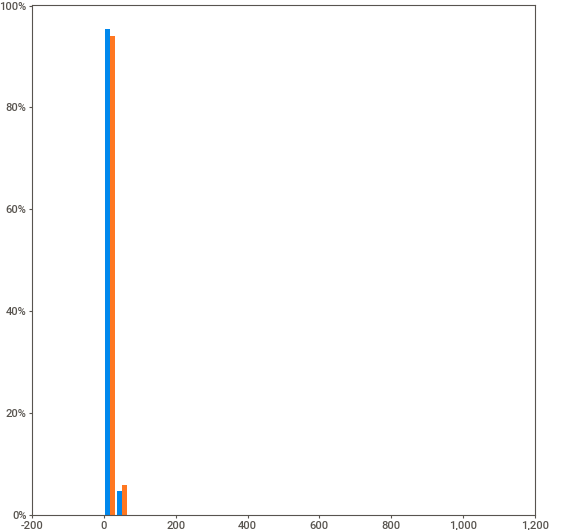
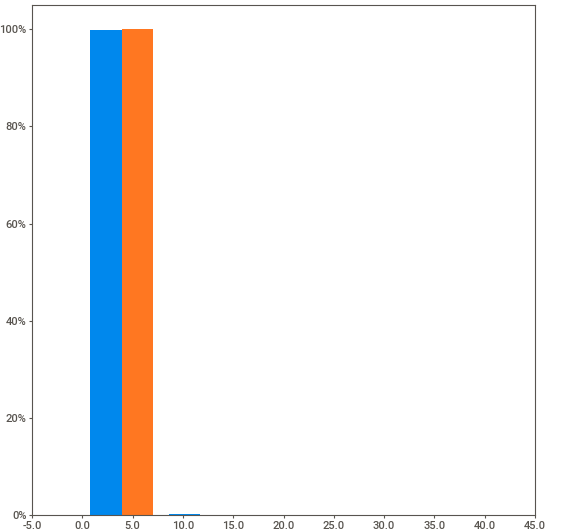
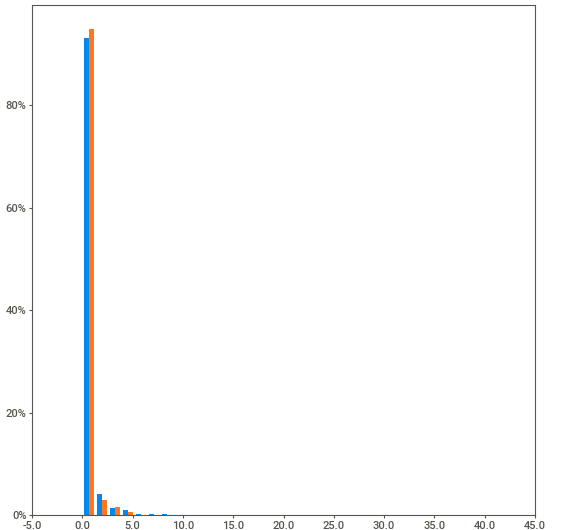
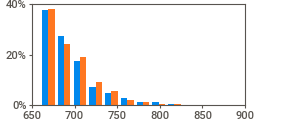
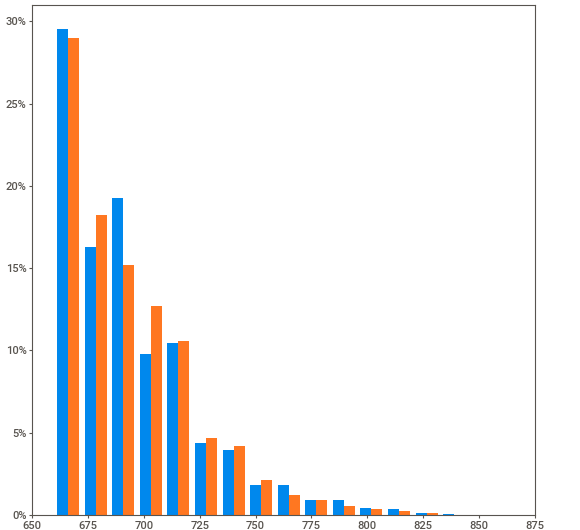
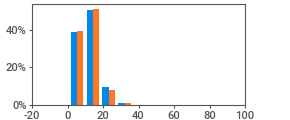
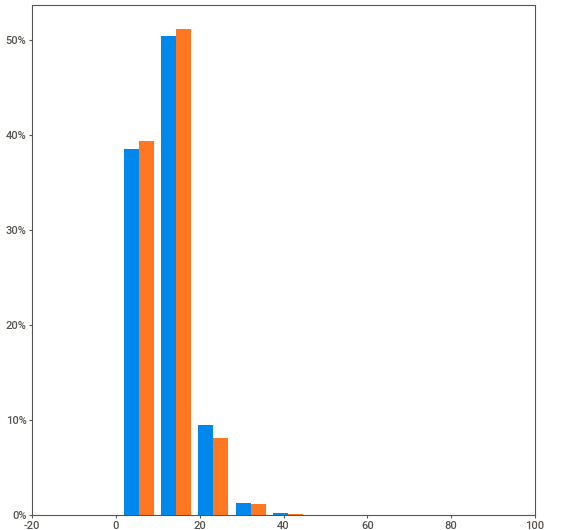
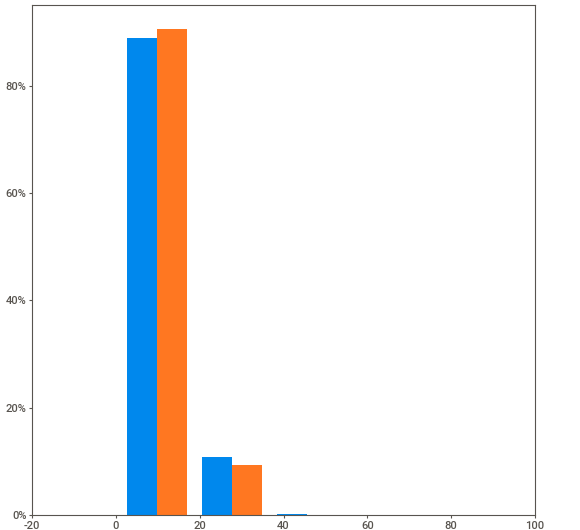
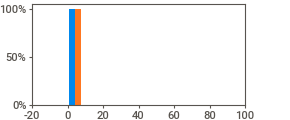
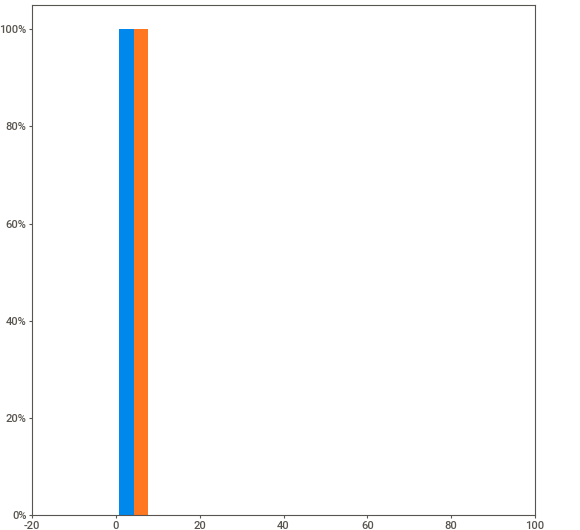
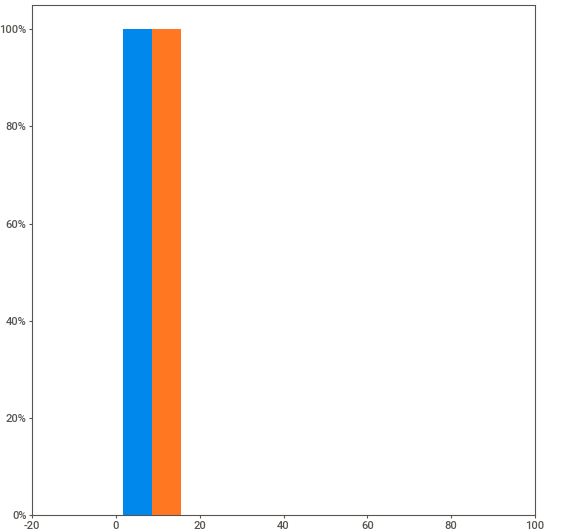
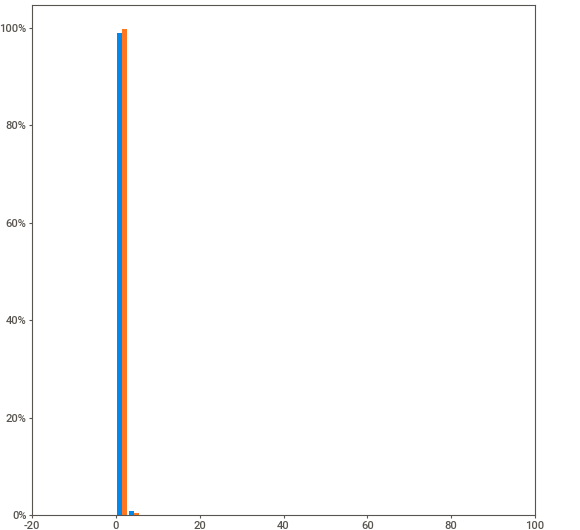
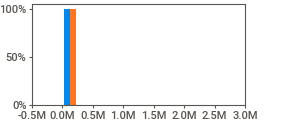
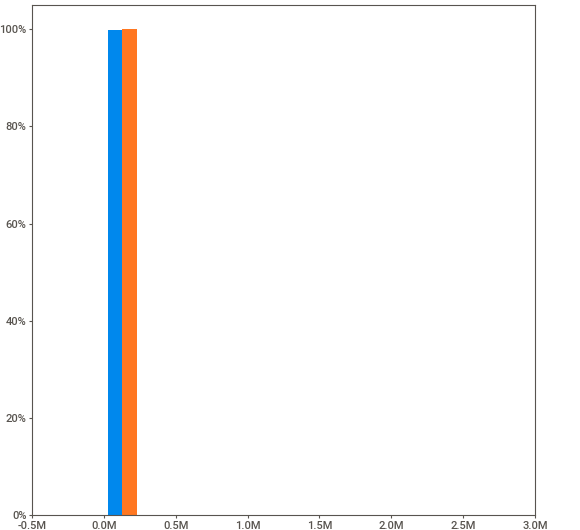
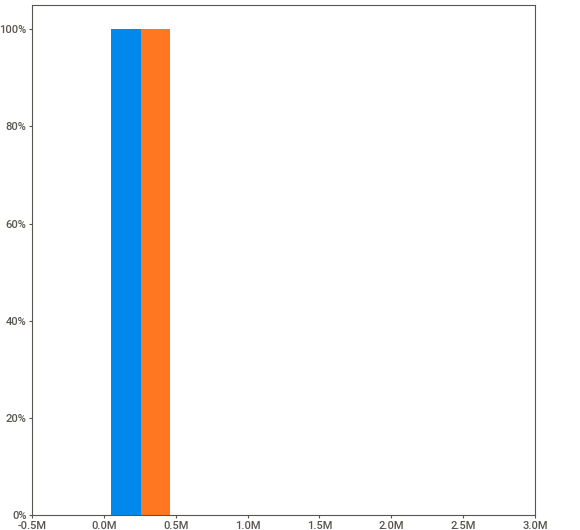
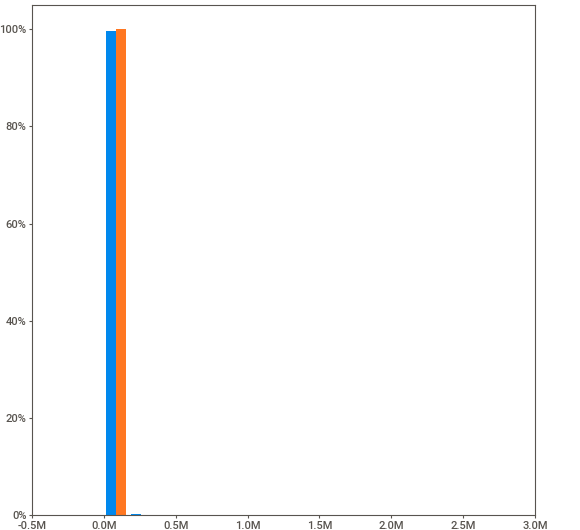
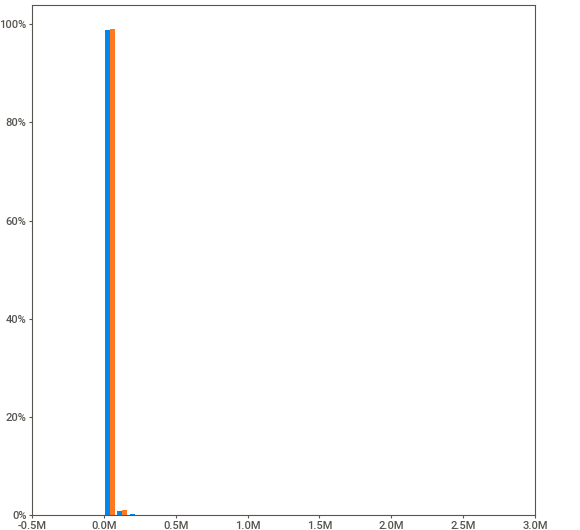
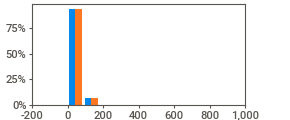
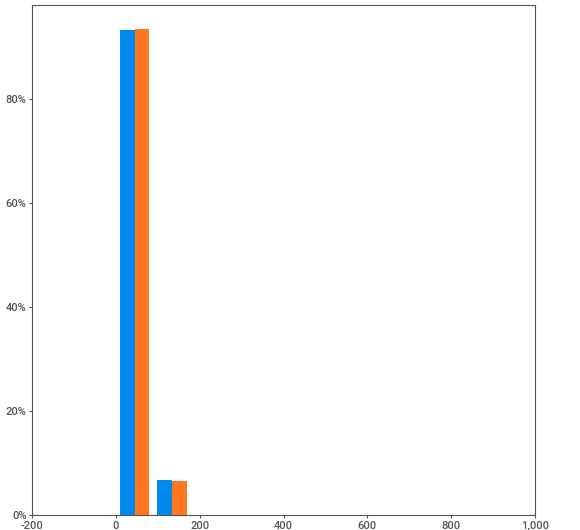
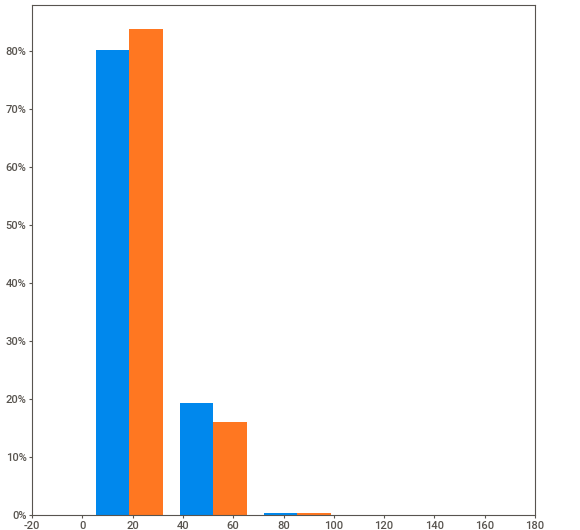
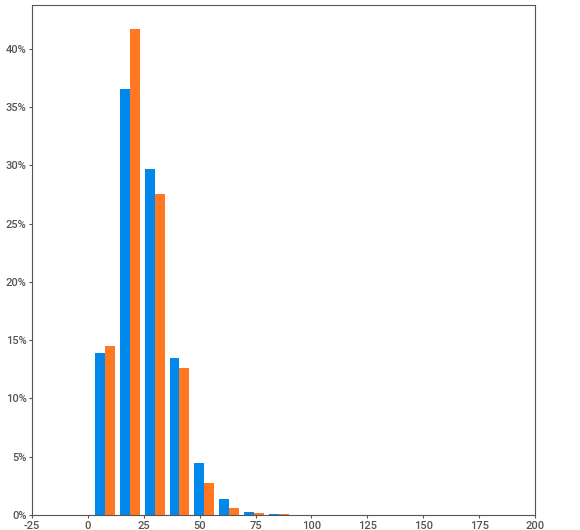
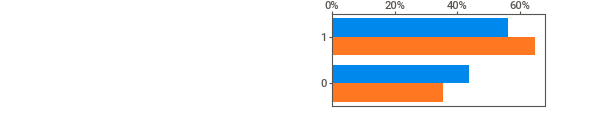
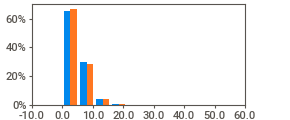
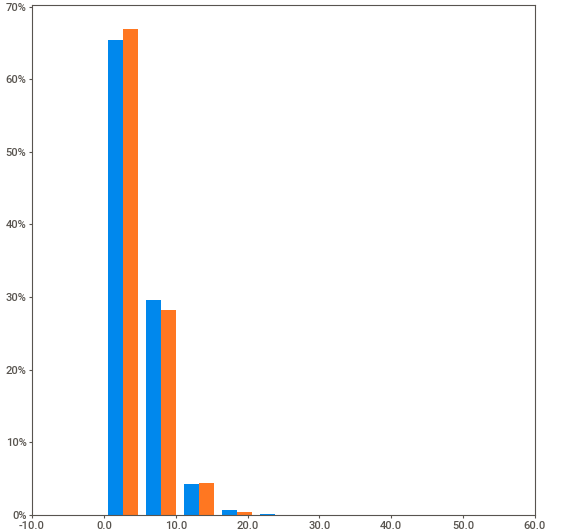
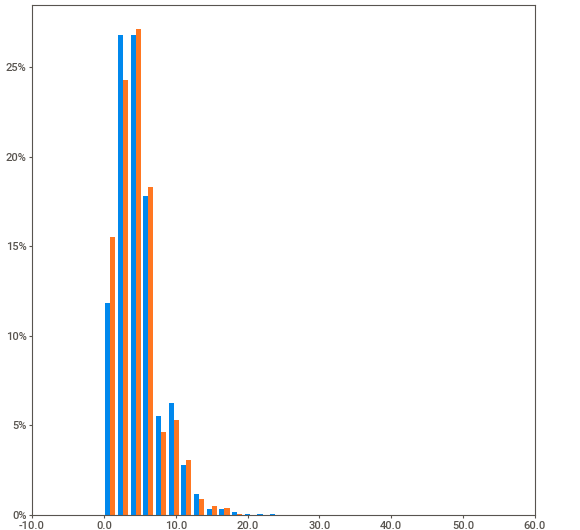
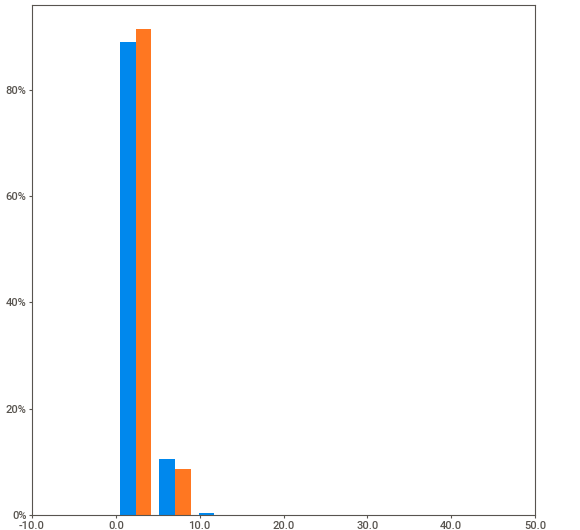
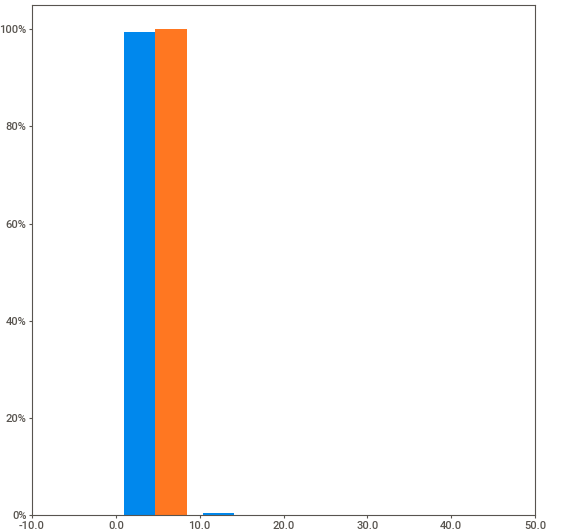
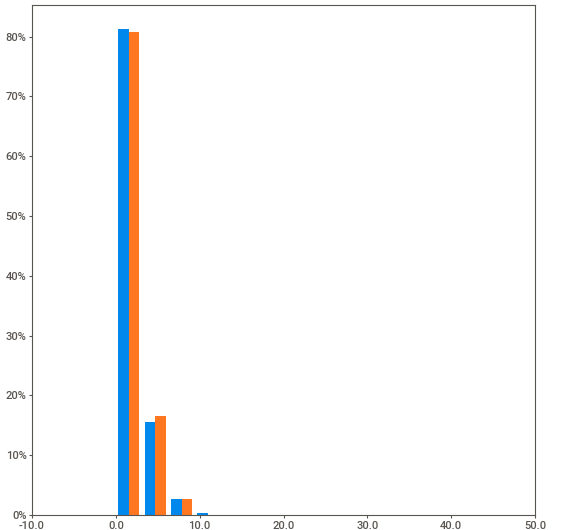
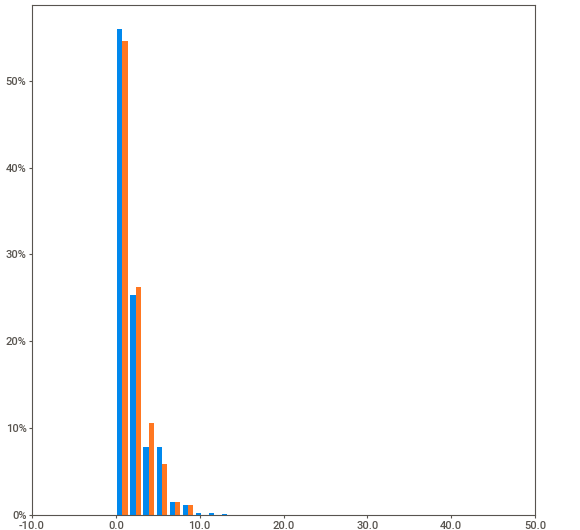
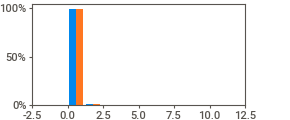
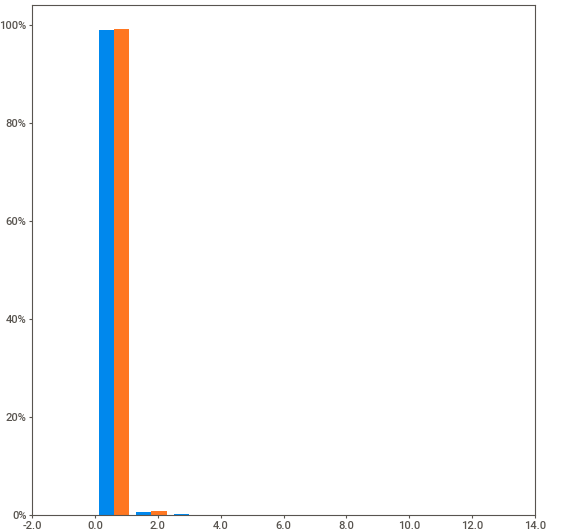
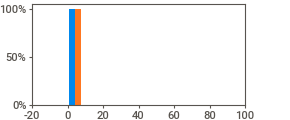
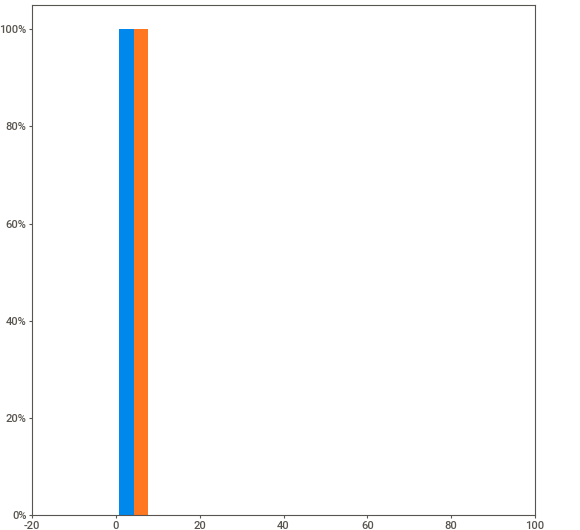
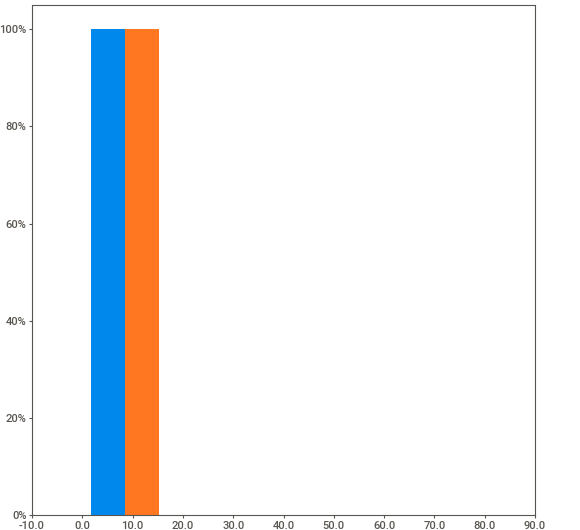
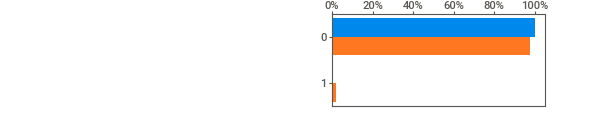
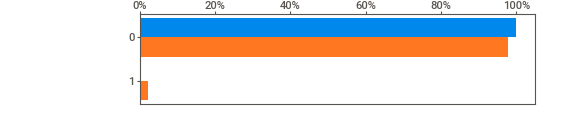
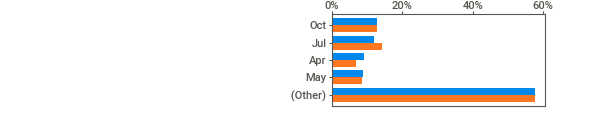
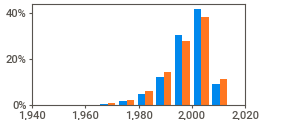
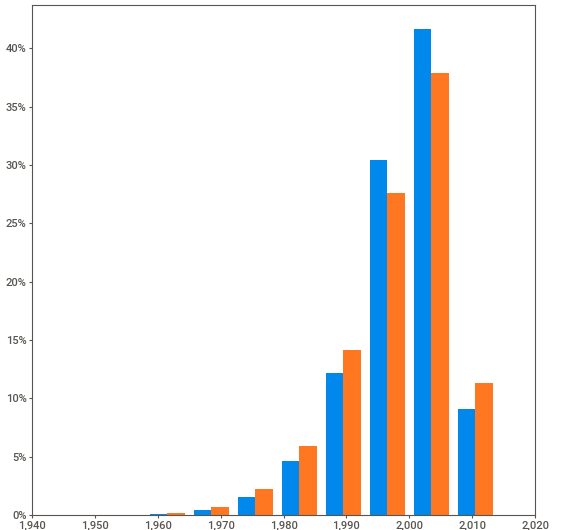
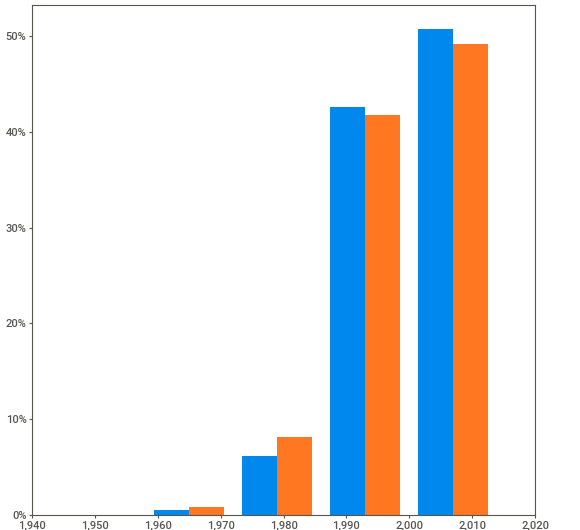
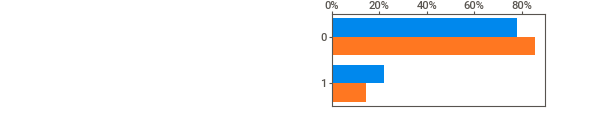
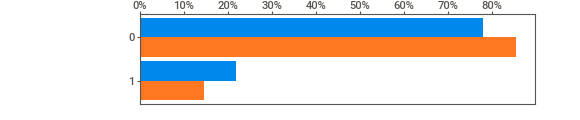
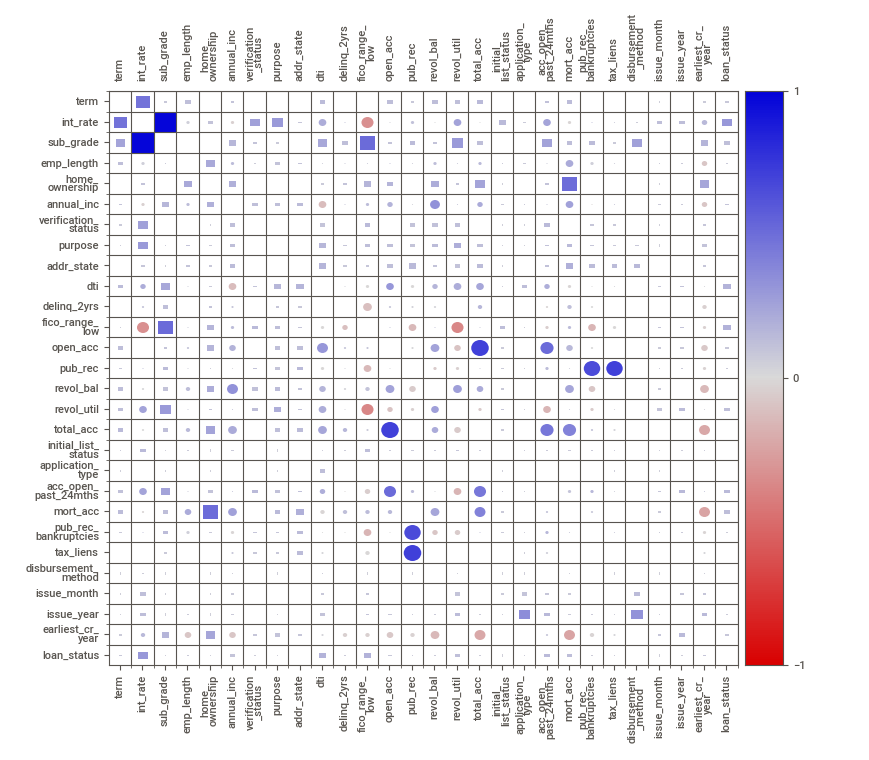

In [7]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([real_data, "Real Data"], [synthetic_data, "Synthetic Data"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

![sweetvix-ex](../reports/sweetviz_ex.png)

In [12]:
table_evaluator = TableEvaluator(real_data, synthetic_data)

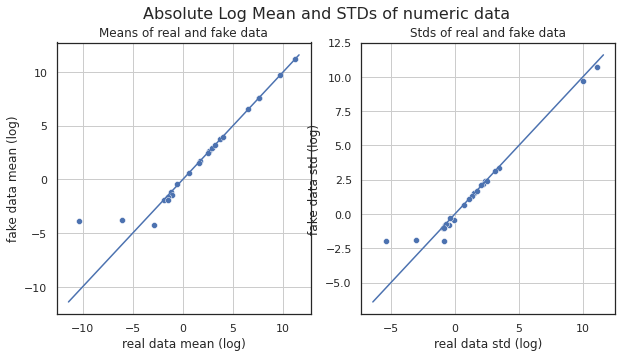

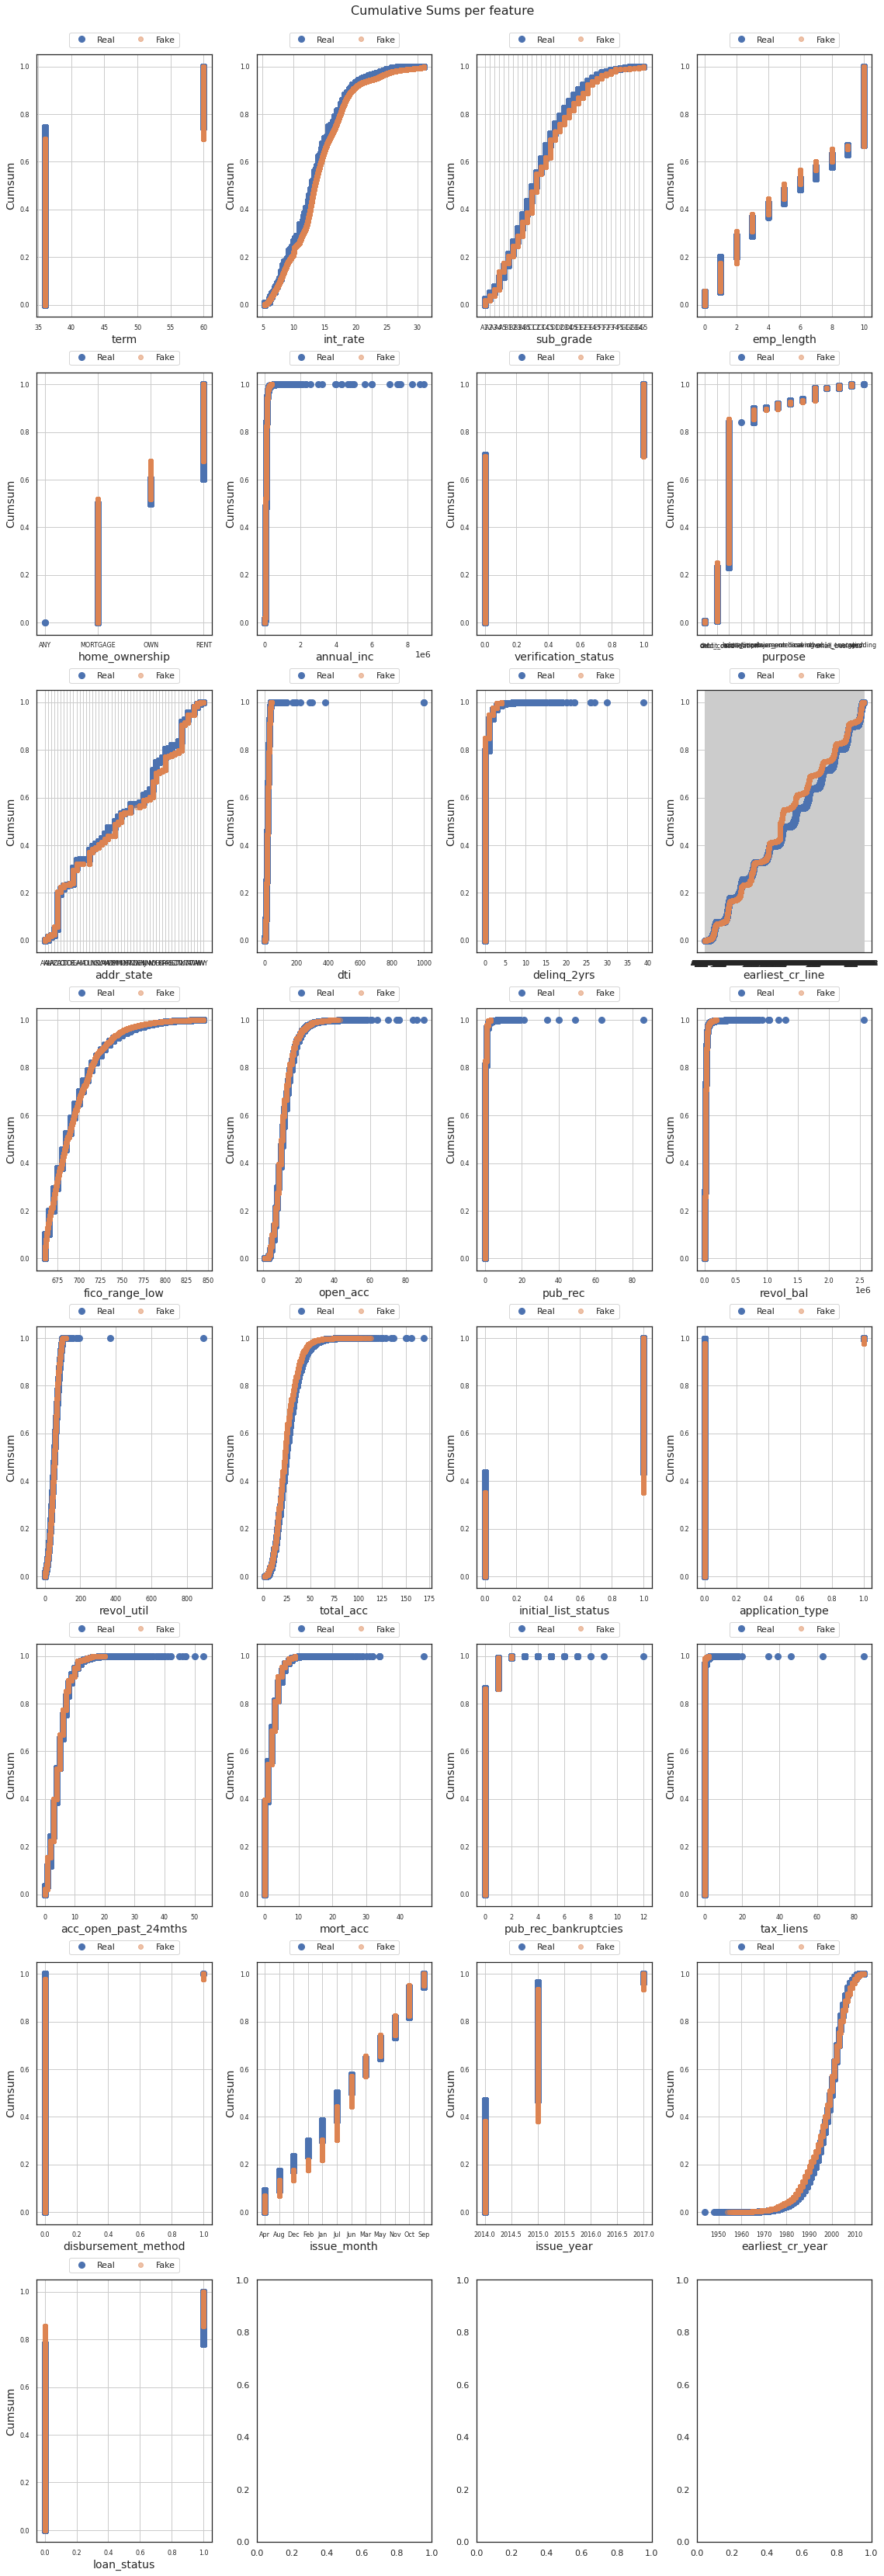

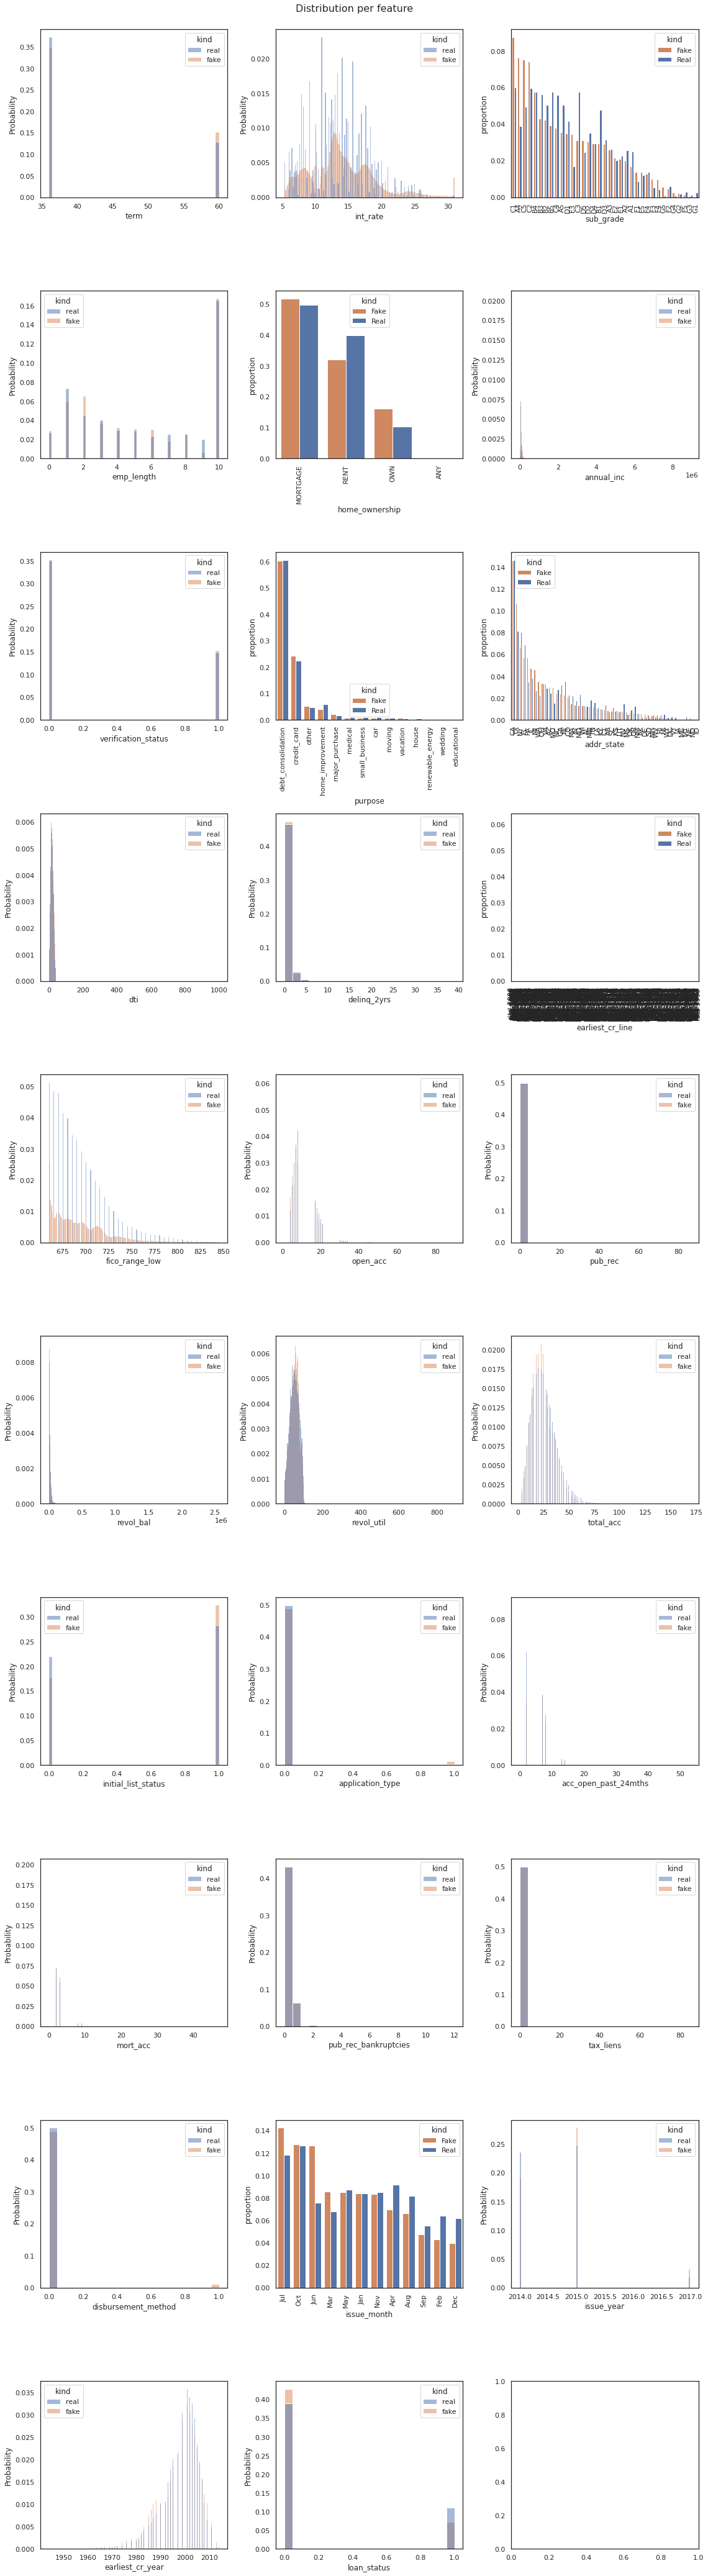

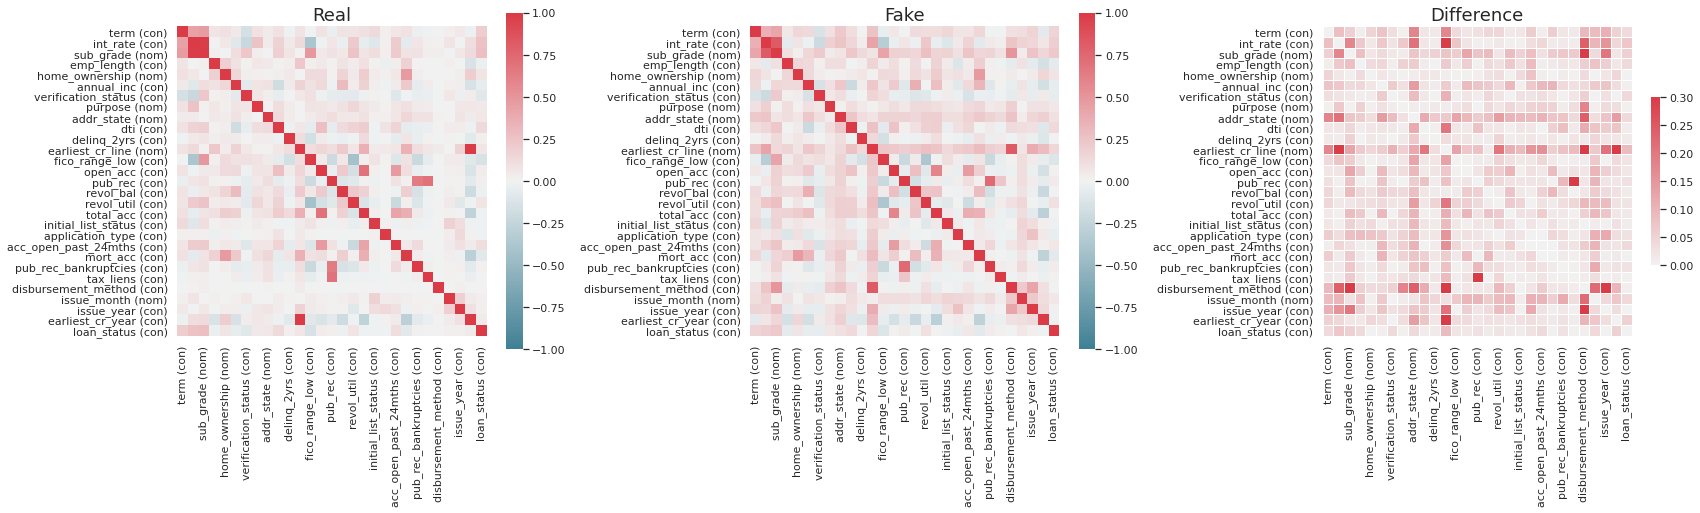

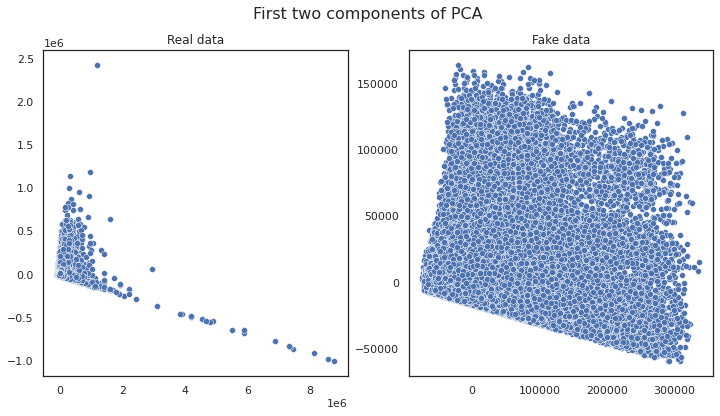

In [13]:
table_evaluator.visual_evaluation()

## Evaluation Metrics

In [ ]:
ev = evaluate(synthetic_data, real_data,metadata,aggregate=False,table_name='nps_sample')
print(ev)

In [ ]:
ev

In [ ]:
ev[ev['raw_score']>0]

In [7]:
table_evaluator = TableEvaluator(real_data, synthetic_data)

In [8]:
table_evaluator.evaluate(target_col='loan_status',target_type='class')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.7025   0.7692              0.5355
DecisionTreeClassifier_real   0.6937   0.7128              0.5460
RandomForestClassifier_fake   0.8297   0.8512              0.8655
RandomForestClassifier_real   0.7757   0.7784              0.8621

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    3.6157
nearest neighbor std                     0.6348

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0888
Column Correlation distance MAE   0.0498

Results:
                                                result
Basic statistics                                0.9960
Correlation column correlations                 0.8055
Mean Correlation 

In [9]:
table_evaluator = TableEvaluator(test, synthetic_data)

In [10]:
table_evaluator.evaluate(target_col='loan_status',target_type='class', notebook=True)

![report_ex](../reports/evaluation_report_ex.png)